## Problem:

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

### Data set for the Problem: Sparkling Wine.csv

## Q1. Read the data as an appropriate Time Series data and plot the data.

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style 
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")

In [99]:
df_spark = pd.read_csv('Sparkling Wine.csv')
df_spark.head(5)

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [100]:
df_spark.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [101]:
df_spark.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

#### Making Timestamp data by setting to index column

In [102]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [103]:
df = pd.DataFrame({'YearMonth':date,
                   'Sparkling':df_spark.Sparkling})
df.set_index('YearMonth',inplace=True)

In [104]:
df.head()

Sparkling
YearMonth            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [105]:
df.tail()

Sparkling
YearMonth            
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [107]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [108]:
df.isnull().sum()

Sparkling    0
dtype: int64

Text(0, 0.5, 'Units Sold')

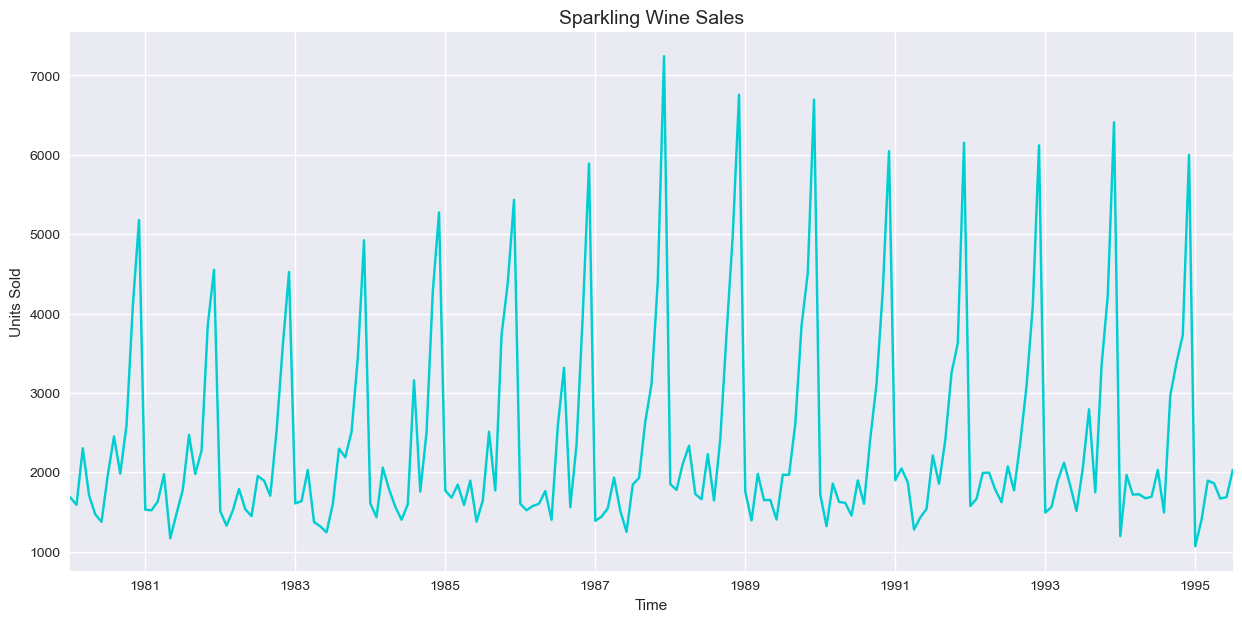

In [109]:
plt.figure(figsize = (15, 7))
df.Sparkling.plot(color='darkturquoise')
plt.title('Sparkling Wine Sales', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

## Q2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Distribution

Text(0, 0.5, 'Distribution')

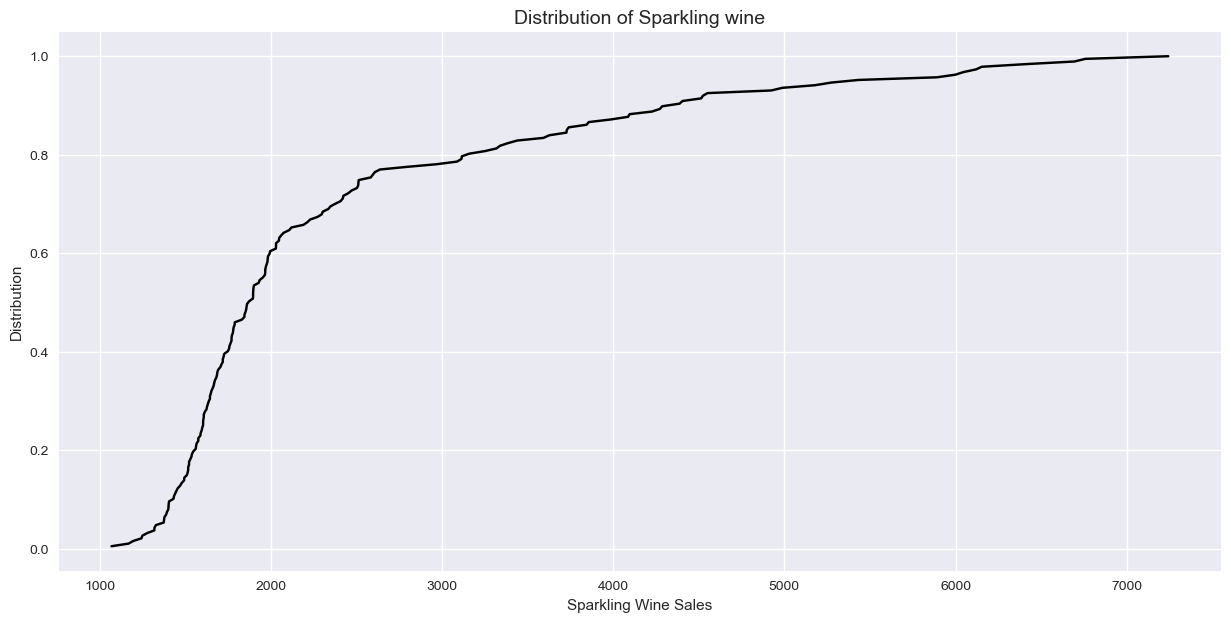

In [110]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize = (15, 7))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'BLACK')
plt.title('Distribution of Sparkling wine', fontsize=14)
plt.xlabel('Sparkling Wine Sales')
plt.ylabel('Distribution')

### Yearly Boxplot

Text(0.5, 1.0, 'Sparkling Yearly Boxplot')

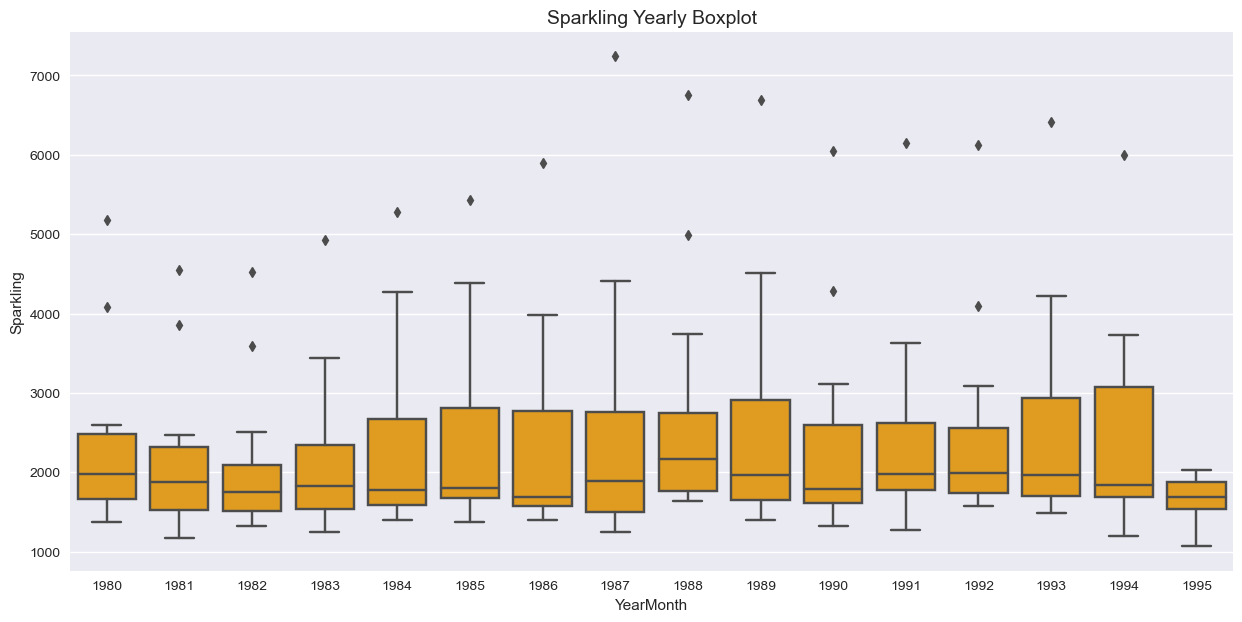

In [111]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = df.index.year,y = df['Sparkling'], color = 'orange')
plt.title('Sparkling Yearly Boxplot', fontsize=14)

### Monthly Boxplot

Text(0.5, 1.0, 'Sparkling Monthly Boxplot')

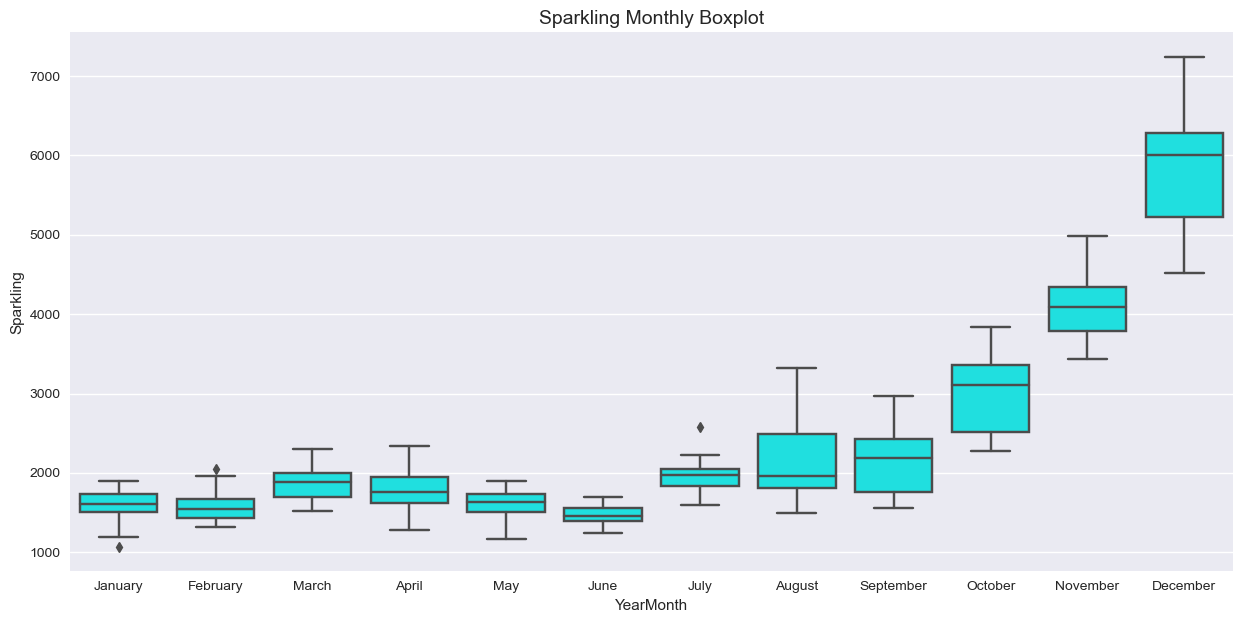

In [112]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'], color = 'cyan')
plt.title('Sparkling Monthly Boxplot', fontsize=14)

### Monthly and Yearly Plot

In [113]:
from pylab import rcParams
rcParams['figure.figsize'] =  15,7

Text(0.5, 1.0, 'Sparkling - Monthly plot')

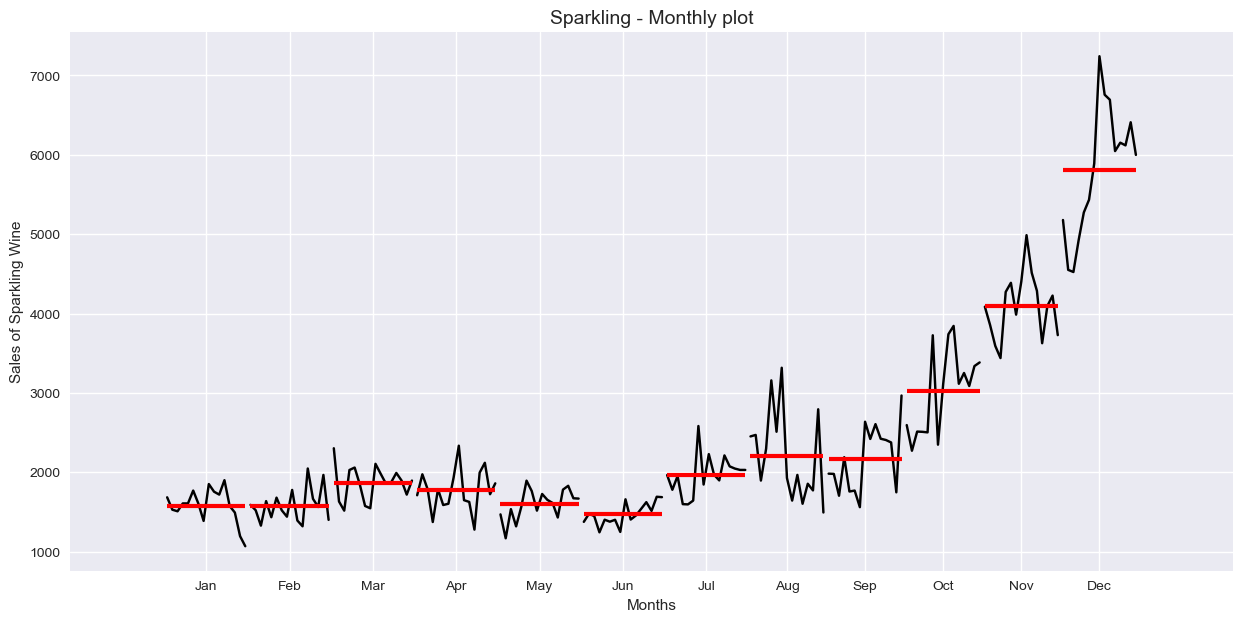

In [114]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df['Sparkling'],ylabel='Sales of Sparkling Wine')
plt.xlabel('Months')
plt.title('Sparkling - Monthly plot', fontsize = 14)

#### Monthly sales across years

In [115]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

Text(0.5, 1.0, 'Monthly sales over years of Sparkling Wine')

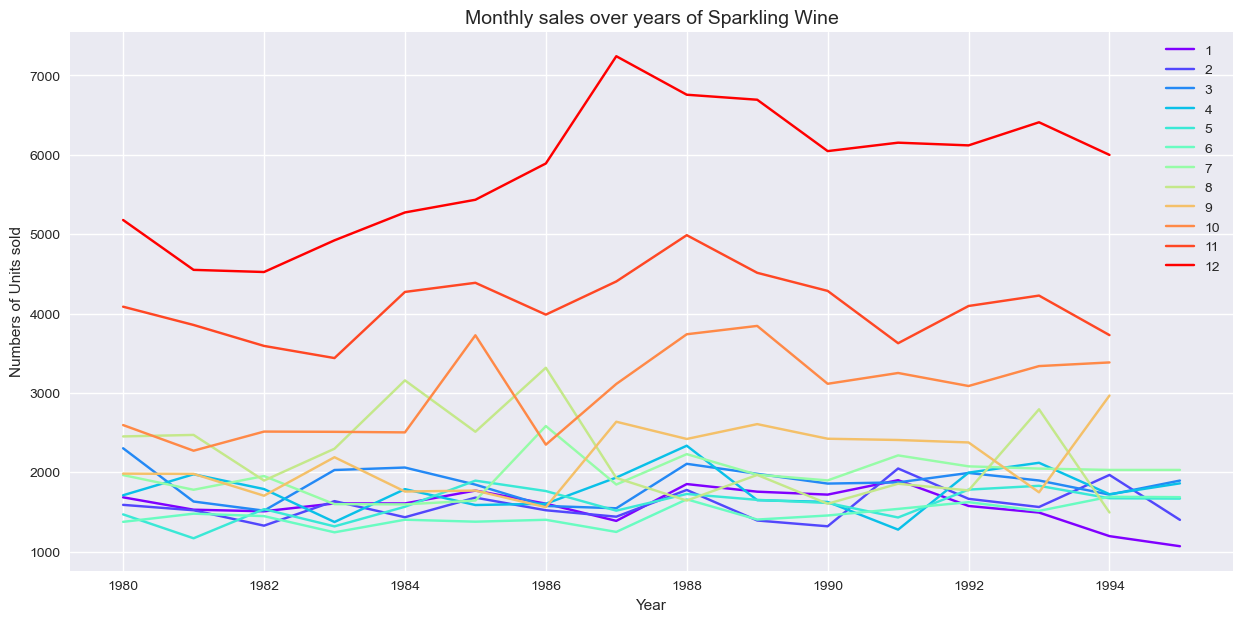

In [116]:
plt.figure.figsize=(15,8)
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Numbers of Units sold')
plt.xlabel('Year')
plt.title('Monthly sales over years of Sparkling Wine', fontsize=14)

#### Average sales per month 

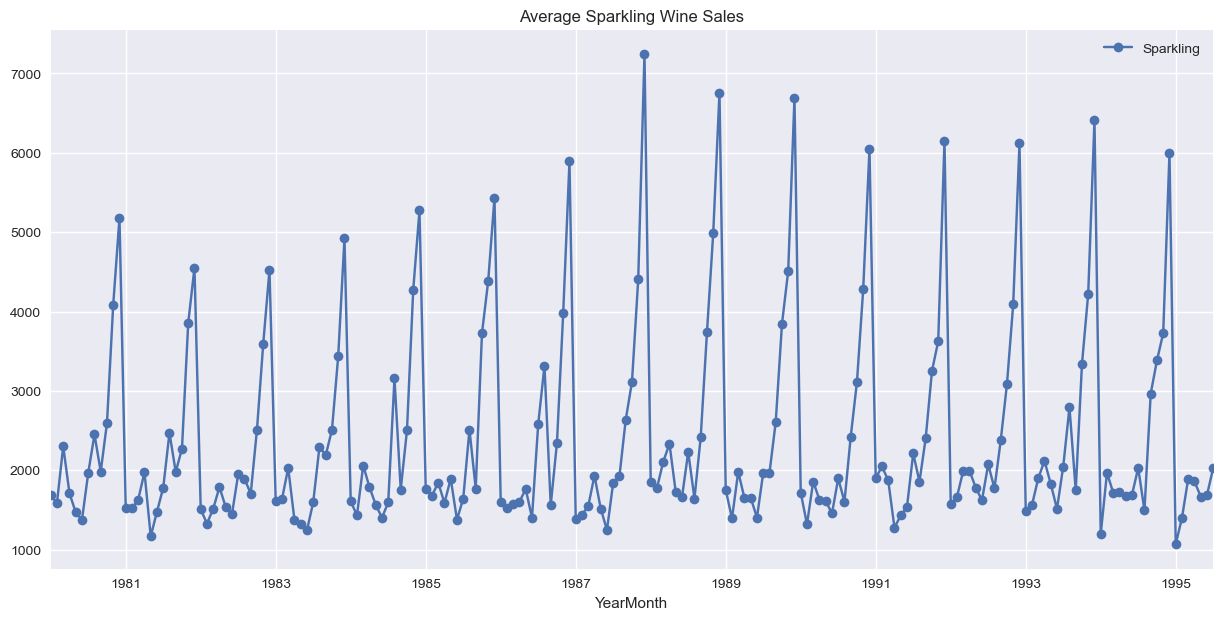

In [117]:
average_s    = df.groupby(df.index)['Sparkling'].mean()
plt.figure.figsize=(17,15)
ax = average_s.plot(legend=True,marker='o',title="Average Sparkling Wine Sales")
plt.legend(loc ='best');

### Decomposition
#### Additive Decomposition

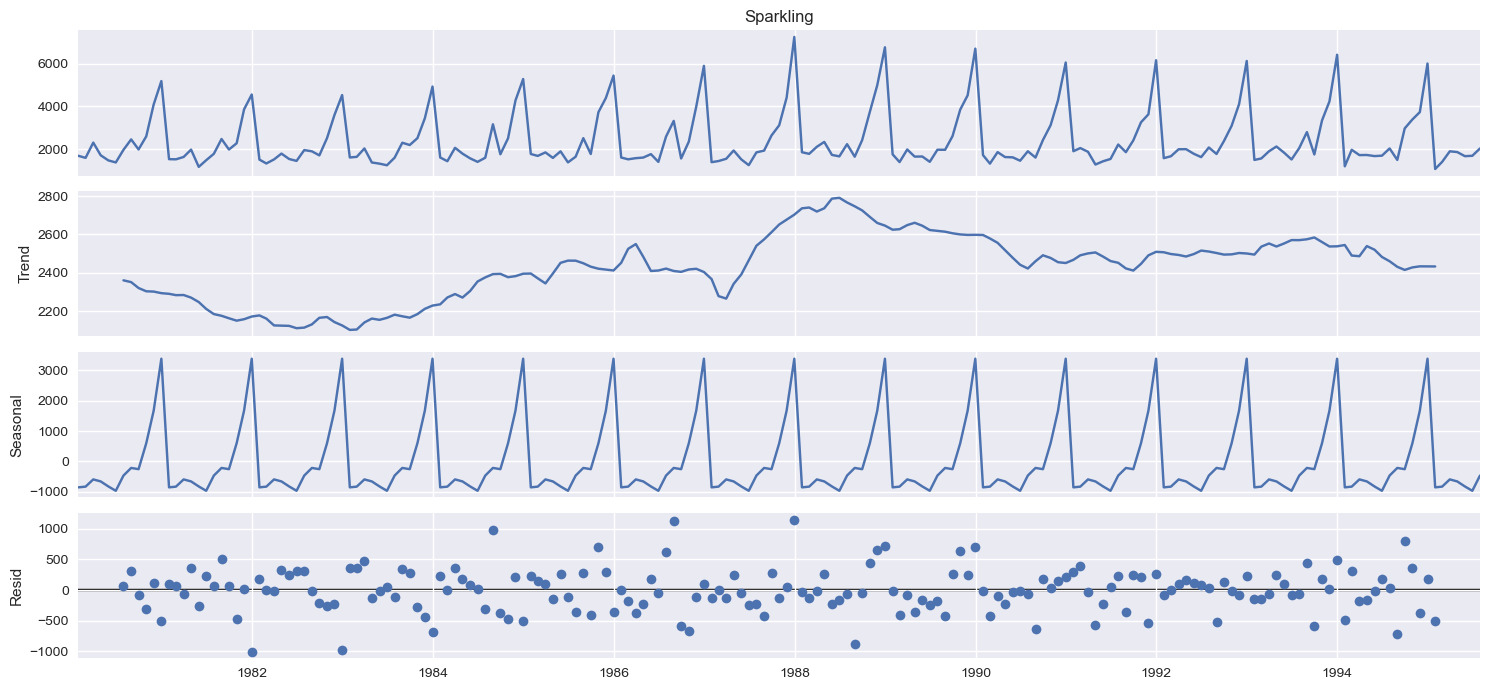

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

In [119]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

Trend 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31   -854.260599
1980-02-29   -830.350678
1980-03-31   -592.356630
1980-04-30   -658.490559
1980-05-31   -824.416154
1980-06-30   -967.434011
1980-07-31   -465.502265
1980-08-31   -214.332821
1980-09-30   -254.677265
1980-10-31    599.769957
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.353290
Name: resid, dtype: float64 



In [120]:
detrend_ts = seasonality + residual

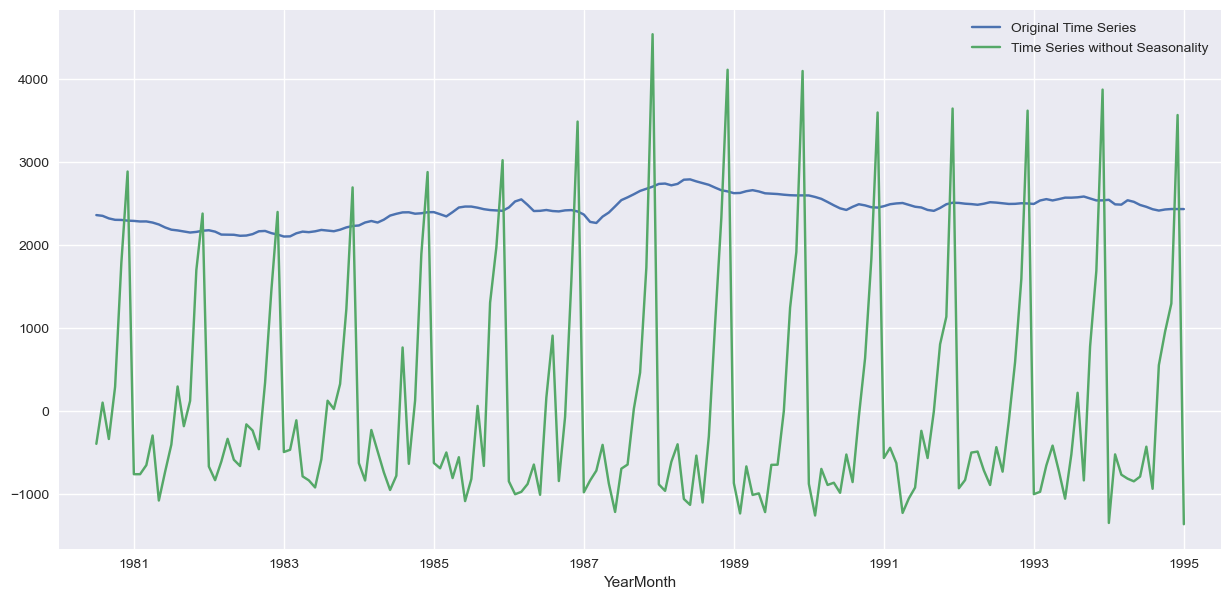

In [121]:
trend.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality"]);

#### Multiplicative Decomposition

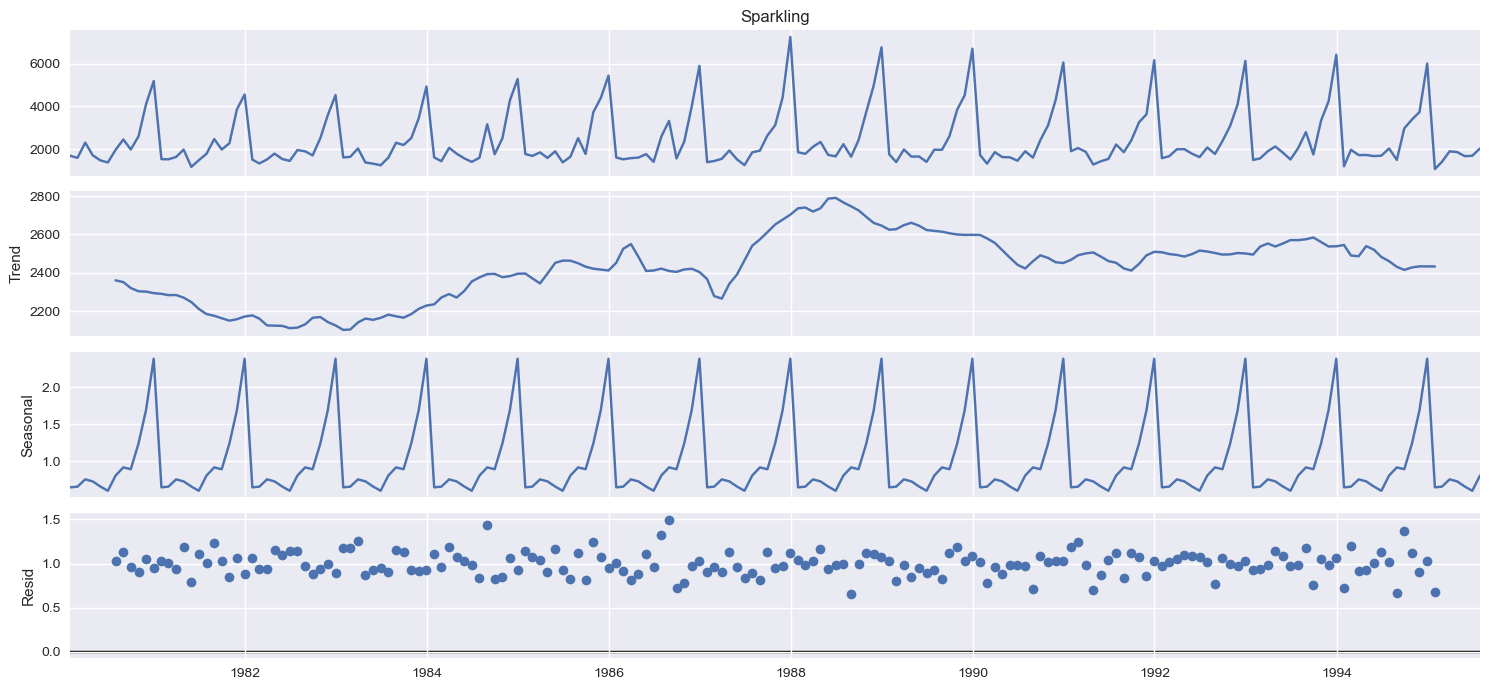

In [122]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [123]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

Trend 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
Name: resid, dtype: float64 



In [124]:
detrend_ts = seasonality + residual

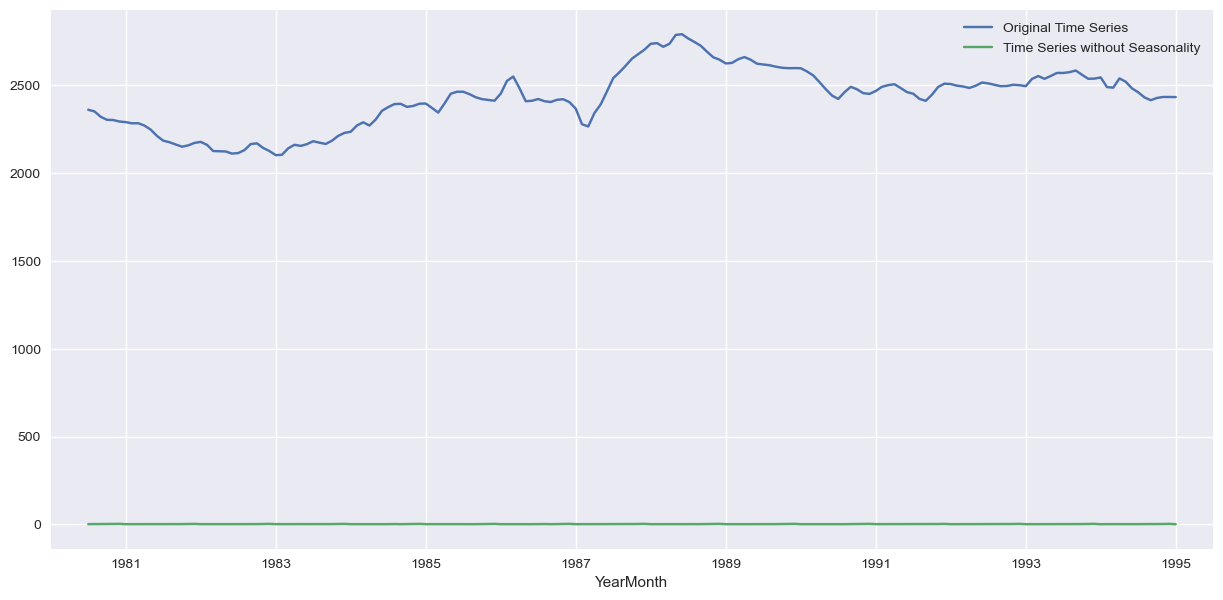

In [125]:
trend.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality"]);

## Q3. Split the data into training and test. The test data should start in 1991.

In [126]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [127]:
from IPython.display import display
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [128]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [129]:
print("Dimensions of the training and test data")
print('Number of rows and columns of the training set :',train.shape)
print('Number of rows and columns of the training set :',test.shape)

Dimensions of the training and test data
Number of rows and columns of the training set : (132, 1)
Number of rows and columns of the training set : (55, 1)


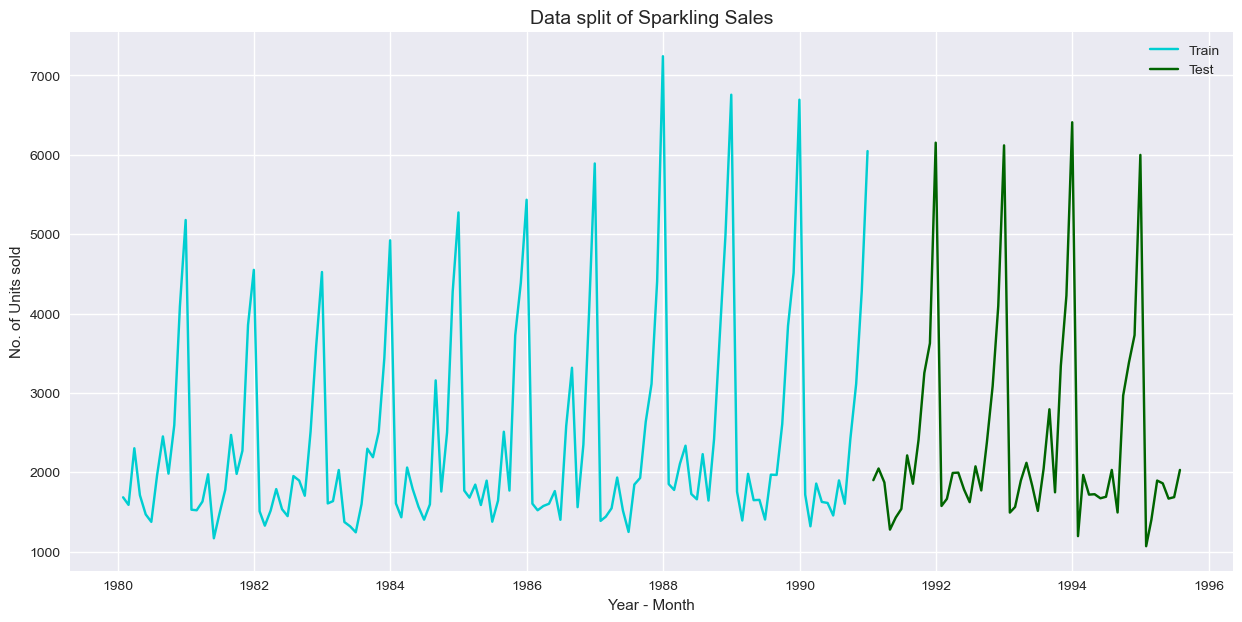

In [130]:
plt.figure(figsize = (15, 7))
plt.plot(train['Sparkling'], label = 'Train', color='darkturquoise')
plt.plot(test['Sparkling'], label = 'Test', color='darkgreen')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('Data split of Sparkling Sales', fontsize = 14)
plt.show;

## Q4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

#### Model 1: Linear Regression

In [131]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [132]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [133]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [134]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [135]:
LinearRegression_train['RegOnTime_spark'] = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_spark'] = lr.predict(LinearRegression_test[['time']])

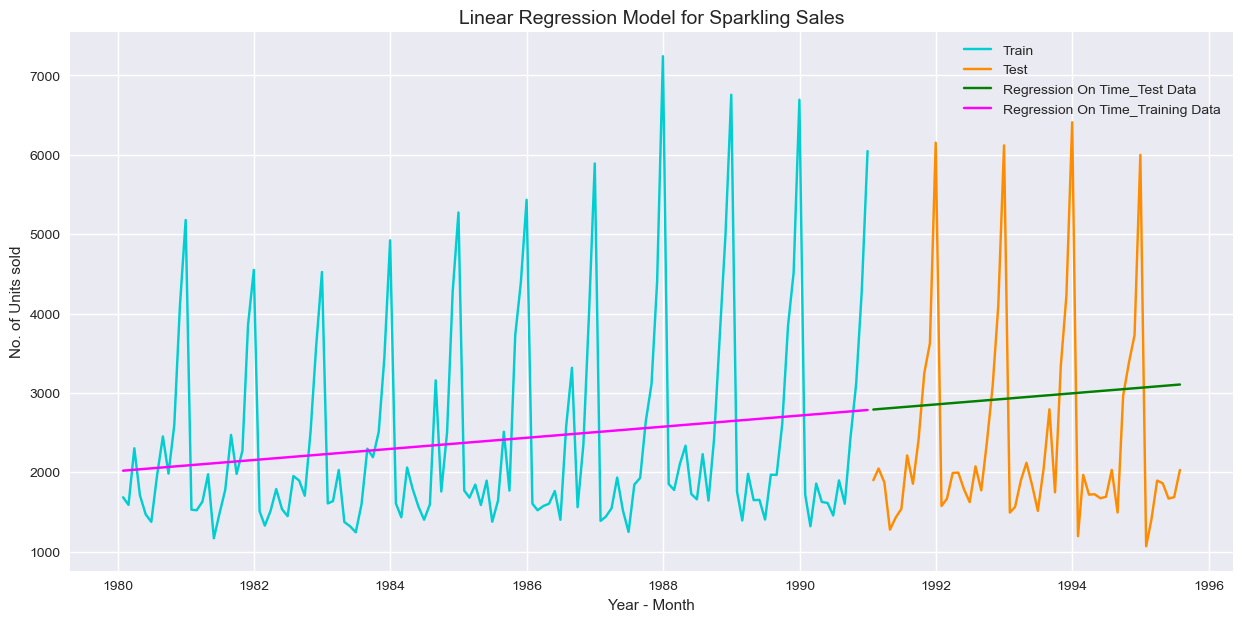

In [136]:
plt.plot( train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression On Time_Test Data', color = 'green')
plt.plot(LinearRegression_train['RegOnTime_spark'], label='Regression On Time_Training Data', color = 'magenta')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('Linear Regression Model for Sparkling Sales', fontsize = 14);

#### Model Evaluation

In [137]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

###### Training Data - RMSE and MAPE

In [138]:
rmse_spark_model1_train = metrics.mean_squared_error(train['Sparkling'],LinearRegression_train['RegOnTime_spark'],squared=False)
mape_spark_model1_train = MAPE(train['Sparkling'],LinearRegression_train['RegOnTime_spark'])
print("For Regression On Time forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_train, mape_spark_model1_train))

For Regression On Time forecast on the Sparkling Training Data:  RMSE is 1279.322 and MAPE is 40.05


###### Testing Data - RMSE and MAPE

In [139]:
rmse_spark_model1_test = metrics.mean_squared_error(test['Sparkling'],LinearRegression_test['RegOnTime_spark'],squared=False)
mape_spark_model1_test = MAPE(test['Sparkling'],LinearRegression_test['RegOnTime_spark'])
print("For Regression On Time forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_test, mape_spark_model1_test))

For Regression On Time forecast on the Sparkling Testing Data:  RMSE is 1389.135 and MAPE is 50.15


In [140]:
spark_resultsDf = pd.DataFrame({'Test RMSE': [rmse_spark_model1_test],'Test MAPE': [mape_spark_model1_test]},index=['Regression On Time'])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time  1389.135175      50.15

#### Model 2: Naive forecast

In [141]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [142]:
NaiveModel_train['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['spark_naive'].head()

YearMonth
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: spark_naive, dtype: int64

In [143]:
NaiveModel_test['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['spark_naive'].head()

YearMonth
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: spark_naive, dtype: int64

Text(0.5, 1.0, 'Naive Forecast Model for Sparkling Wine')

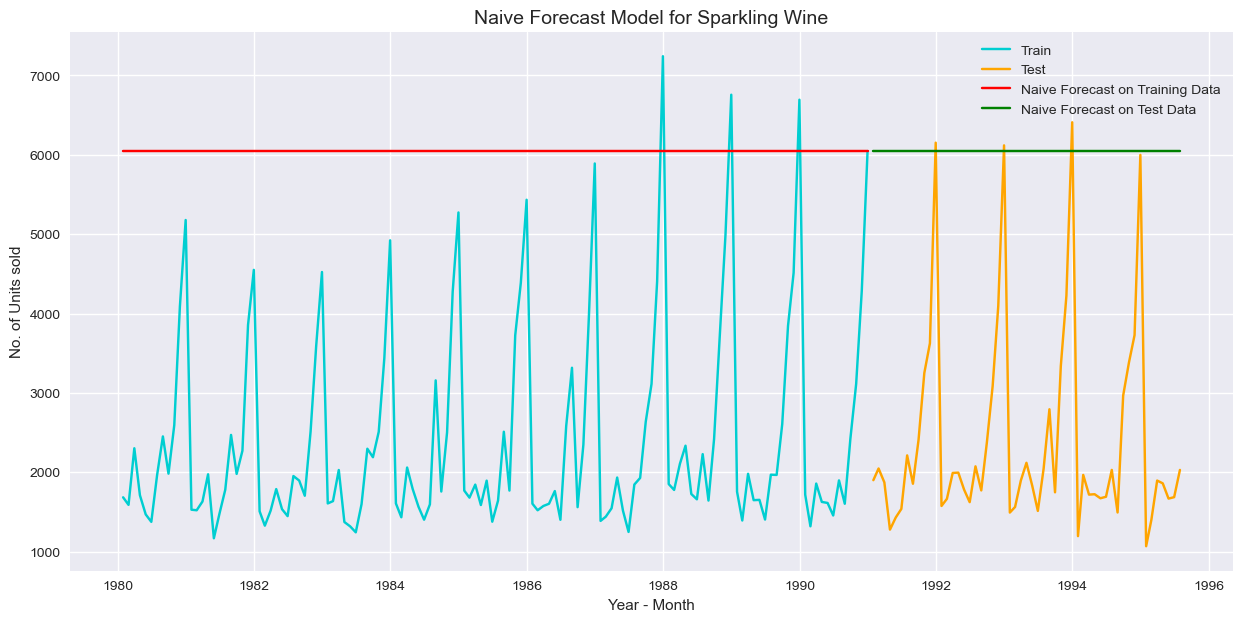

In [144]:
plt.plot(NaiveModel_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['spark_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title("Naive Forecast Model for Sparkling Wine", fontsize = 14)

#### Model Evauation

###### Training Data - RMSE and MAPE

In [145]:
rmse_spark_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['spark_naive'],squared=False)
mape_spark_model2_train = MAPE(train['Sparkling'],NaiveModel_train['spark_naive'])
print("For Naive forecast Model on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_train, mape_spark_model2_train))

For Naive forecast Model on the Sparkling Training Data:  RMSE is 3867.701 and MAPE is 153.17


###### Testing Data - RMSE and MAPE

In [146]:
rmse_spark_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['spark_naive'],squared=False)
mape_spark_model2_test = MAPE(test['Sparkling'],NaiveModel_test['spark_naive'])
print("For Naive forecast Model on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_test, mape_spark_model2_test))

For Naive forecast Model on the Sparkling Testing Data:  RMSE is 3864.279 and MAPE is 152.87


In [147]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model2_test],'Test MAPE': [mape_spark_model2_test]},index=['NaiveModel'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2]).drop_duplicates()
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time  1389.135175      50.15
NaiveModel          3864.279352     152.87

#### Model 3: Simple Average

In [148]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [149]:
SimpleAverage_train['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train['spark_mean_forecast'].head()

YearMonth
1980-01-31    2403.780303
1980-02-29    2403.780303
1980-03-31    2403.780303
1980-04-30    2403.780303
1980-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

In [150]:
SimpleAverage_test['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test['spark_mean_forecast'].head()

YearMonth
1991-01-31    2403.780303
1991-02-28    2403.780303
1991-03-31    2403.780303
1991-04-30    2403.780303
1991-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

Text(0.5, 1.0, 'SimpleAverage Forecast for Sparkling Wine')

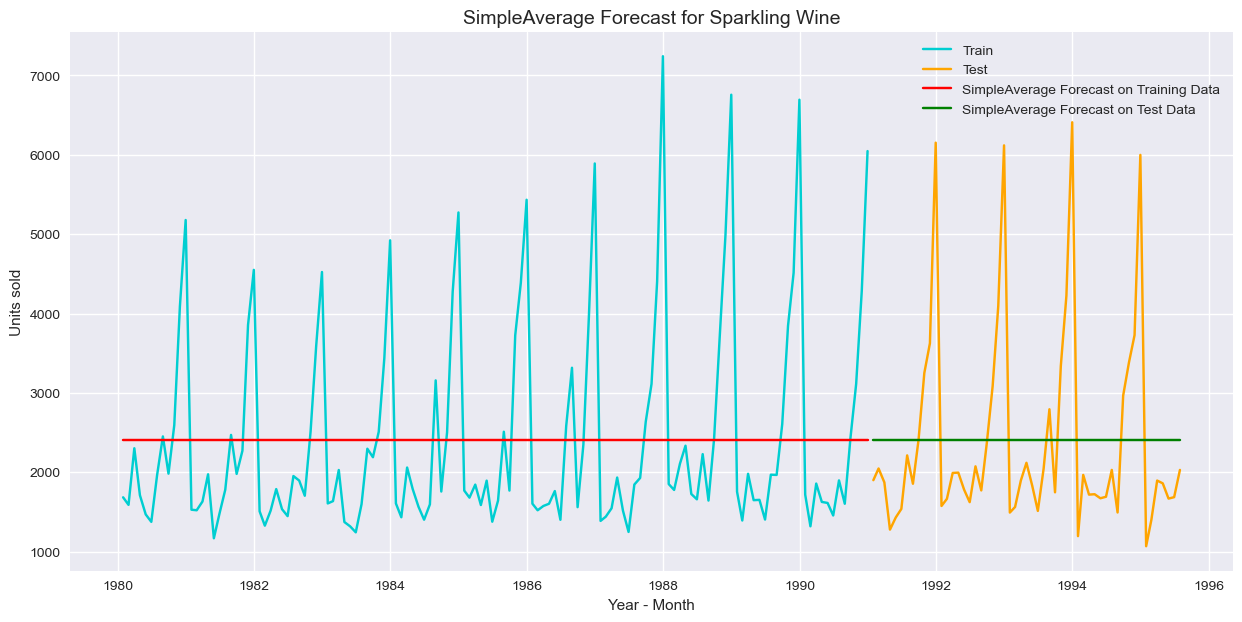

In [151]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['spark_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("SimpleAverage Forecast for Sparkling Wine", fontsize=14)

#### Model Evaluation

###### Training Data - RMSE and MAPE

In [152]:
rmse_spark_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'],squared=False)
mape_spark_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'])
print("For Simple Average forecast Model on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_train, mape_spark_model3_train))

For Simple Average forecast Model on the Sparkling Training Data:  RMSE is 1298.484 and MAPE is 40.36


###### Testing Data - RMSE and MAPE

In [153]:
rmse_spark_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'],squared=False)
mape_spark_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'])
print("For Simple Average forecast Model on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_test, mape_spark_model3_test))

For Simple Average forecast Model on the Sparkling Testing Data:  RMSE is 1275.082 and MAPE is 38.90


In [154]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model3_test],'Test MAPE': [mape_spark_model3_test]},index=['SimpleAverage'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time  1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverage       1275.081804      38.90

#### Model 4: Moving Average

In [155]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [156]:
MovingAverage['Spark_Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Spark_Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Spark_Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Spark_Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

In [157]:
MovingAverage.head()

Sparkling  Spark_Trailing_2  Spark_Trailing_4  Spark_Trailing_6  \
YearMonth                                                                     
1980-01-31       1686               NaN               NaN               NaN   
1980-02-29       1591            1638.5               NaN               NaN   
1980-03-31       2304            1947.5               NaN               NaN   
1980-04-30       1712            2008.0           1823.25               NaN   
1980-05-31       1471            1591.5           1769.50               NaN   

            Spark_Trailing_9  
YearMonth                     
1980-01-31               NaN  
1980-02-29               NaN  
1980-03-31               NaN  
1980-04-30               NaN  
1980-05-31               NaN

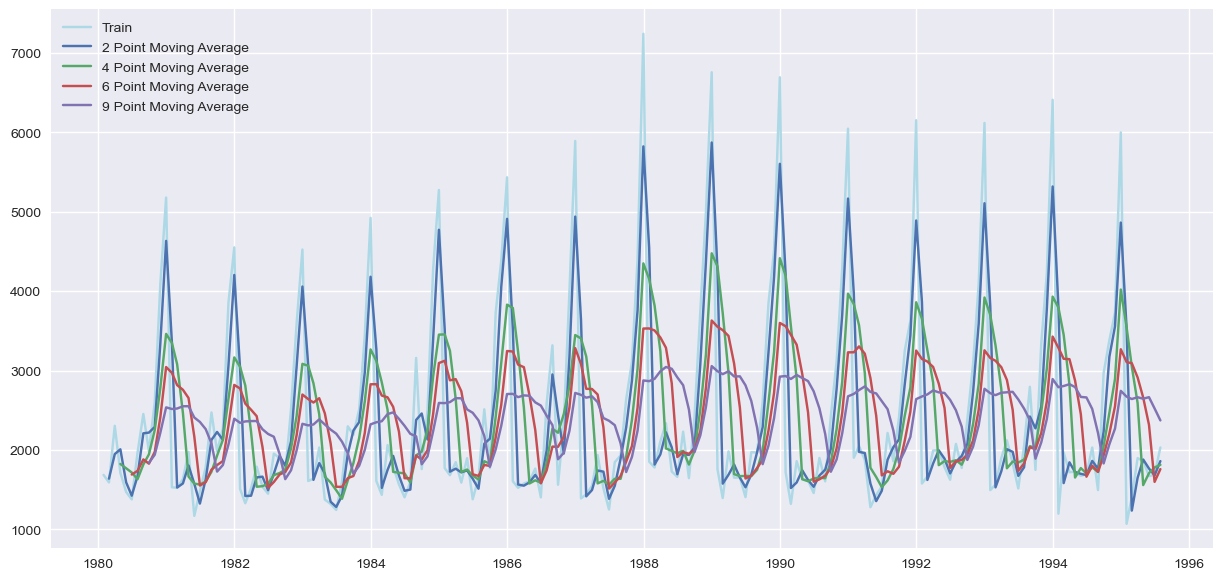

In [158]:
plt.plot(MovingAverage['Sparkling'], label='Train', color='lightblue')
plt.plot(MovingAverage['Spark_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

###### Creating train and test set 

In [159]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

###### Plotting on both the Training and Test data

Text(0.5, 1.0, 'Trailing Moving Average Forecast Model for Sparkling Wine')

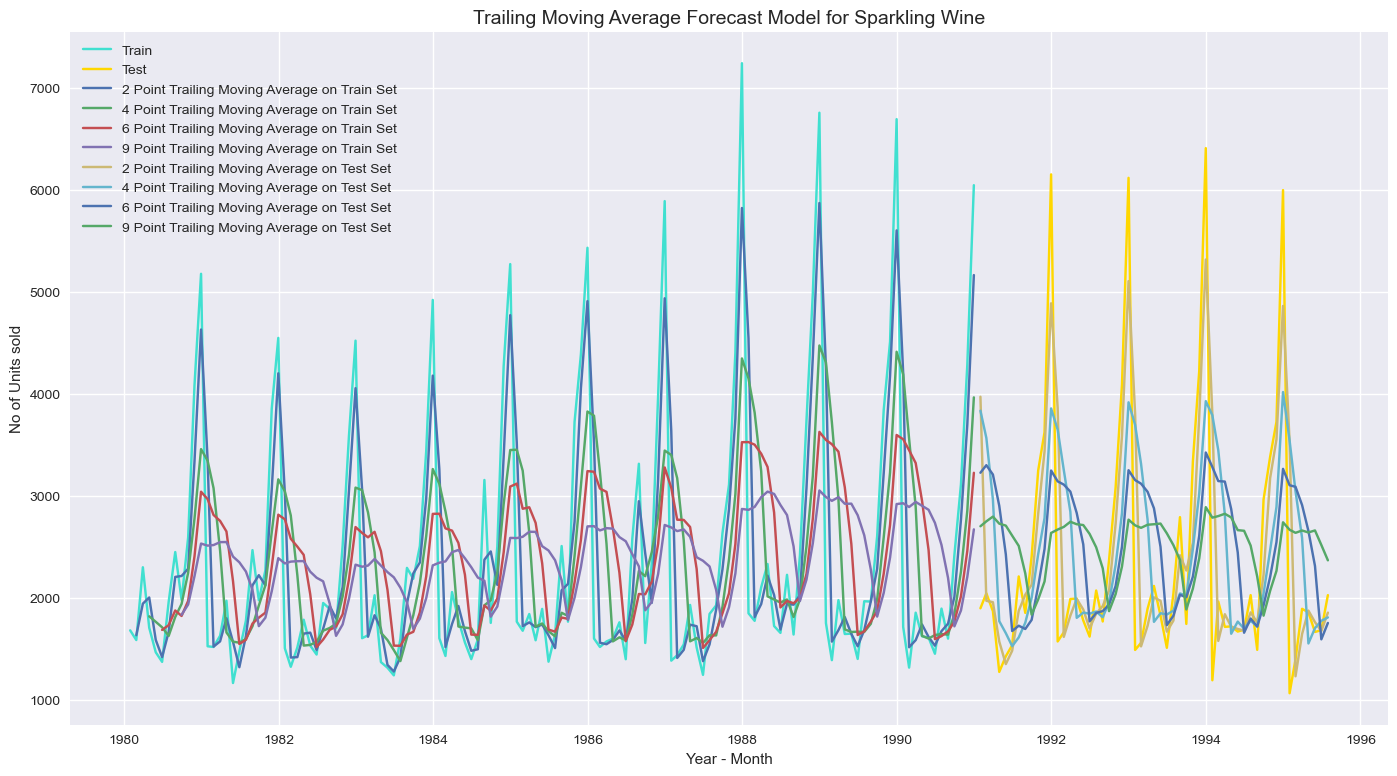

In [160]:
plt.figure(figsize=(17,9))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train', color = 'turquoise')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

plt.xlabel('Year - Month')
plt.ylabel('No of Units sold')

plt.title("Trailing Moving Average Forecast Model for Sparkling Wine", fontsize=14)

#### Model Evaluation

###### Test Data - rmse_spark and mape_spark for 2 point Spark_Trailing MA

In [161]:
rmse_spark_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'],squared=False)
mape_spark_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_2, mape_spark_model4_test_2))

For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is 813.401 mape_spark is 19.70


###### Test Data - rmse_spark and mape_spark for 4 point Spark_Trailing MA

In [162]:
rmse_spark_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'],squared=False)
mape_spark_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_4, mape_spark_model4_test_4))

For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is 1156.590 mape_spark is 35.96


###### Test Data - rmse_spark and mape_spark for 6 point Spark_Trailing MA

In [163]:
rmse_spark_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'],squared=False)
mape_spark_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_6, mape_spark_model4_test_6))

For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is 1283.927 mape_spark is 43.86


###### Test Data - rmse_spark and mape_spark for 9 point Spark_Trailing MA

In [164]:
rmse_spark_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'],squared=False)
mape_spark_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_9, mape_spark_model4_test_9))

For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is 1346.278 mape_spark is 46.86


In [165]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_spark_model4_test_2,rmse_spark_model4_test_4
                                          ,rmse_spark_model4_test_6,rmse_spark_model4_test_9]
                            ,'Test MAPE': [mape_spark_model4_test_2,mape_spark_model4_test_4,
                                           mape_spark_model4_test_6,mape_spark_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_4])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time  1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverage       1275.081804      38.90
2 point TMA          813.400684      19.70
4 point TMA         1156.589694      35.96
6 point TMA         1283.927428      43.86
9 point TMA         1346.278315      46.86

#### Model 5: Simple Exponential Smoothing

In [166]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [167]:
SES_train = train.copy()
SES_test = test.copy()

In [168]:
SES_train['Sparkling'].head()

YearMonth
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
Name: Sparkling, dtype: int64

In [169]:
model = SimpleExpSmoothing(np.asarray(SES_train['Sparkling']))

Test: For alpha = 0.05,  RMSE is 1316.4117 MAPE is 45.50
For smoothing level = 0.05,  Initial level 1686.00


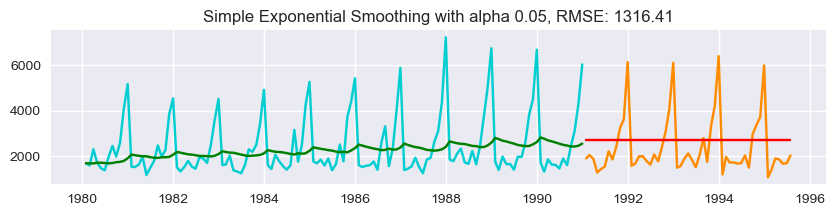

Test: For alpha = 0.10,  RMSE is 1375.3934 MAPE is 49.53
For smoothing level = 0.10,  Initial level 1686.00


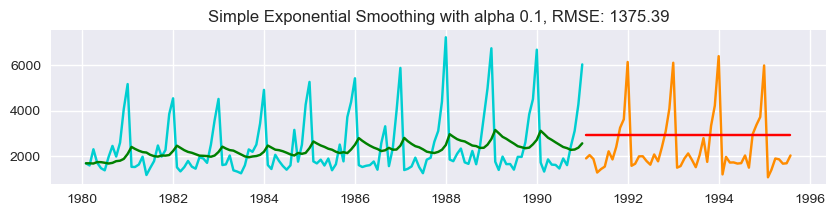

Test: For alpha = 0.20,  RMSE is 1595.2068 MAPE is 60.46
For smoothing level = 0.20,  Initial level 1686.00


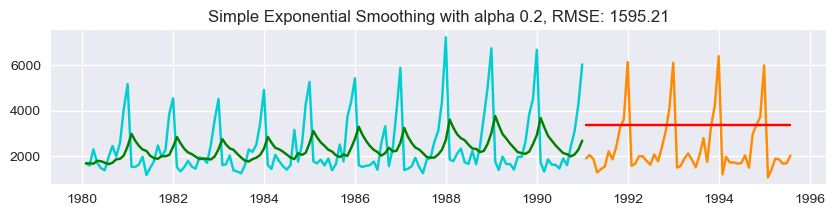

Test: For alpha = 0.30,  RMSE is 1935.5071 MAPE is 75.66
For smoothing level = 0.30,  Initial level 1686.00


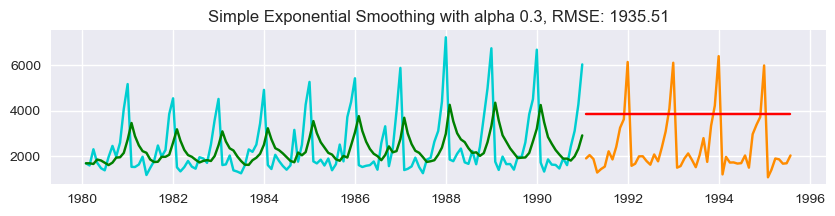

Test: For alpha = 0.50,  RMSE is 2666.3514 MAPE is 106.27
For smoothing level = 0.50,  Initial level 1686.00


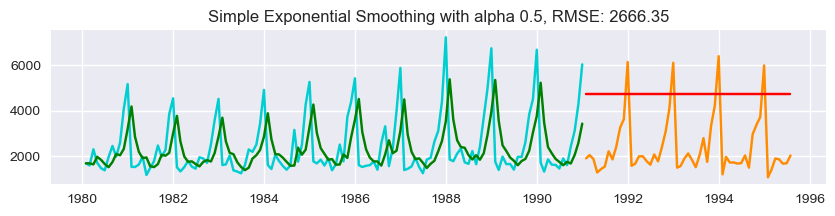

Test: For alpha = 0.99,  RMSE is 3847.5490 MAPE is 152.21
For smoothing level = 0.99,  Initial level 1686.00


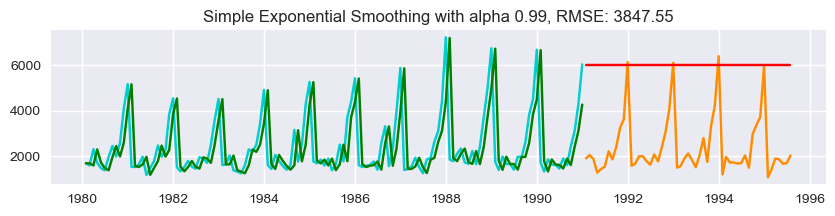

In [170]:
alpha_list = [0.05, 0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() 


for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Sparkling']))
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Sparkling'], pred_test_SES[alpha_str]))
    mape                 =  MAPE(test['Sparkling'],pred_test_SES[alpha_str])
    


    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    plt.plot(train['Sparkling'], color = 'darkturquoise')
    plt.plot(test['Sparkling'], color = 'darkorange')
    plt.plot(pred_train_SES[alpha_str], color = 'green')
    plt.plot(pred_test_SES[alpha_str], color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2))) 
    plt.show();

In [171]:
model_SES_autofit = model.fit(optimized=True,use_brute=True)

In [172]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [173]:
SES_train['predict_spark'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling  predict_spark
YearMonth                           
1980-01-31       1686    1686.000000
1980-02-29       1591    1686.000000
1980-03-31       2304    1682.244186
1980-04-30       1712    1706.825230
1980-05-31       1471    1707.029814

In [174]:
SES_test['predict_spark'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling  predict_spark
YearMonth                           
1991-01-31       1902    2676.676366
1991-02-28       2049    2676.676366
1991-03-31       1874    2676.676366
1991-04-30       1279    2676.676366
1991-05-31       1432    2676.676366

###### Plotting on both the Training and Test data

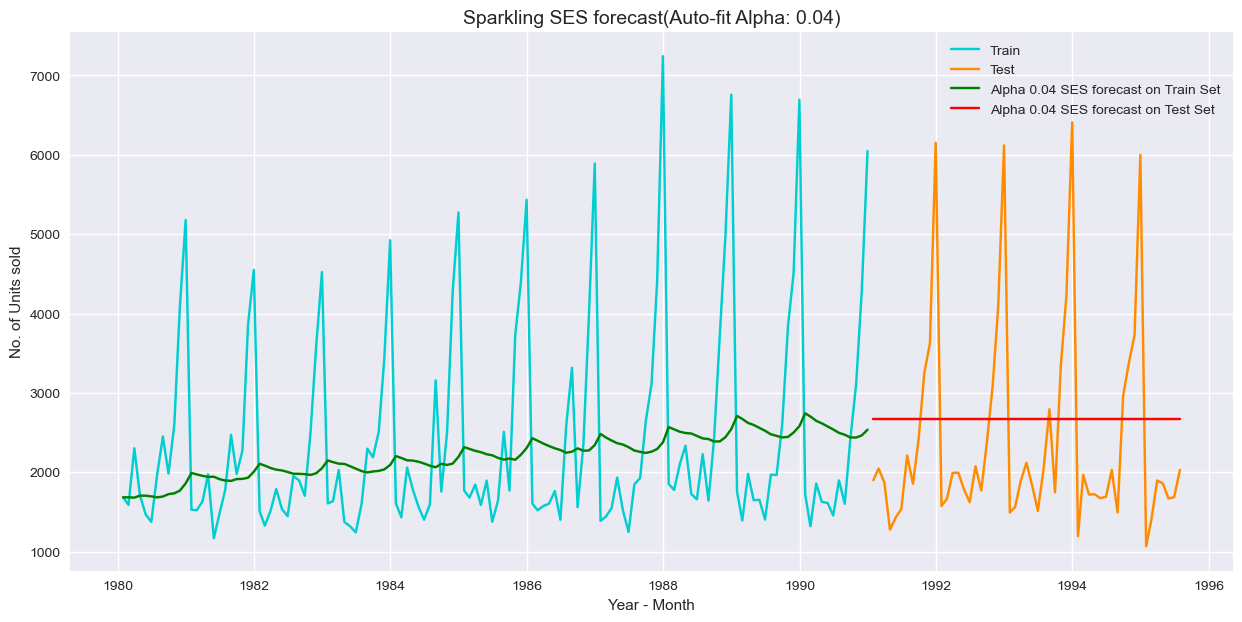

In [175]:
plt.plot(SES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(SES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SES_train['predict_spark'],color = 'green', label='Alpha 0.04 SES forecast on Train Set')
plt.plot(SES_test['predict_spark'],color = 'red', label='Alpha 0.04 SES forecast on Test Set')

plt.legend(loc='best')

plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('Sparkling SES forecast(Auto-fit Alpha: 0.04)', fontsize = 14);

#### Model Evaluation

###### Sparkling Training Data - RMSE and MAPE

In [176]:
rmse_spark_model5_train = metrics.mean_squared_error(train['Sparkling'],SES_train['predict_spark'],squared=False)
mape_spark_model5_train = MAPE(train['Sparkling'],SES_train['predict_spark'])
print("For SES forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_train, mape_spark_model5_train))

For SES forecast on the Sparkling Training Data:  RMSE is 1317.131 and MAPE is 39.05


###### Sparkling Testing Data - RMSE and MAPE 

In [177]:
rmse_spark_model5_test = metrics.mean_squared_error(test['Sparkling'],SES_test['predict_spark'],squared=False)
mape_spark_model5_test = MAPE(test['Sparkling'],SES_test['predict_spark'])
print("For SES forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_test, mape_spark_model5_test))

For SES forecast on the Sparkling Testing Data:  RMSE is 1304.927 and MAPE is 44.48


In [178]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_spark_model5_test],'Test MAPE': [mape_spark_model5_test]},index=['SES Alpha 0.00'])
spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_5])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time  1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverage       1275.081804      38.90
2 point TMA          813.400684      19.70
4 point TMA         1156.589694      35.96
6 point TMA         1283.927428      43.86
9 point TMA         1346.278315      46.86
SES Alpha 0.00      1304.927405      44.48

#### Model 6: Double Exponential Smoothing (Holt's Model)

In [179]:
DES_train = train.copy()
DES_test = test.copy()

In [180]:
import statsmodels
statsmodels.__version__

'0.14.0'

In [184]:
from statsmodels.tsa.holtwinters import Holt
model_DES = Holt(DES_train['Sparkling'])

In [185]:
resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[],
                            'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=True,use_brute=True)
        DES_train['predict_spark',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict_spark',i,j] = model_DES_alpha_i_j.forecast(len(test['Sparkling']))
        
        rmse_spark_model6_train = np.round(metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',i,j],squared=False),2)
        mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',i,j])
        
        rmse_spark_model6_test = np.round(metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',i,j],squared=False),2)
        mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',i,j])
        
        resultsDf_6 = pd.concat([resultsDf_6, pd.DataFrame({'Alpha': [i], 'Beta': [j],
                                                     'Train RMSE': [rmse_spark_model6_train],
                                                     'Train MAPE': [mape_spark_model6_train],
                                                     'Test RMSE': [rmse_spark_model6_test],
                                                     'Test MAPE': [mape_spark_model6_test]})], ignore_index=True)

In [186]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1     1382.52       44.37    1778.56      67.20
1     0.1   0.2     1413.60       46.14    2599.44      95.43
10    0.2   0.1     1418.04       46.65    3611.76     135.41
2     0.1   0.3     1445.76       47.43    4293.08     155.43
20    0.3   0.1     1431.17       46.99    5908.19     223.50

In [187]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1     1382.52       44.37    1778.56      67.20
1     0.1   0.2     1413.60       46.14    2599.44      95.43
10    0.2   0.1     1418.04       46.65    3611.76     135.41
2     0.1   0.3     1445.76       47.43    4293.08     155.43
3     0.1   0.4     1480.90       48.79    6039.54     218.98

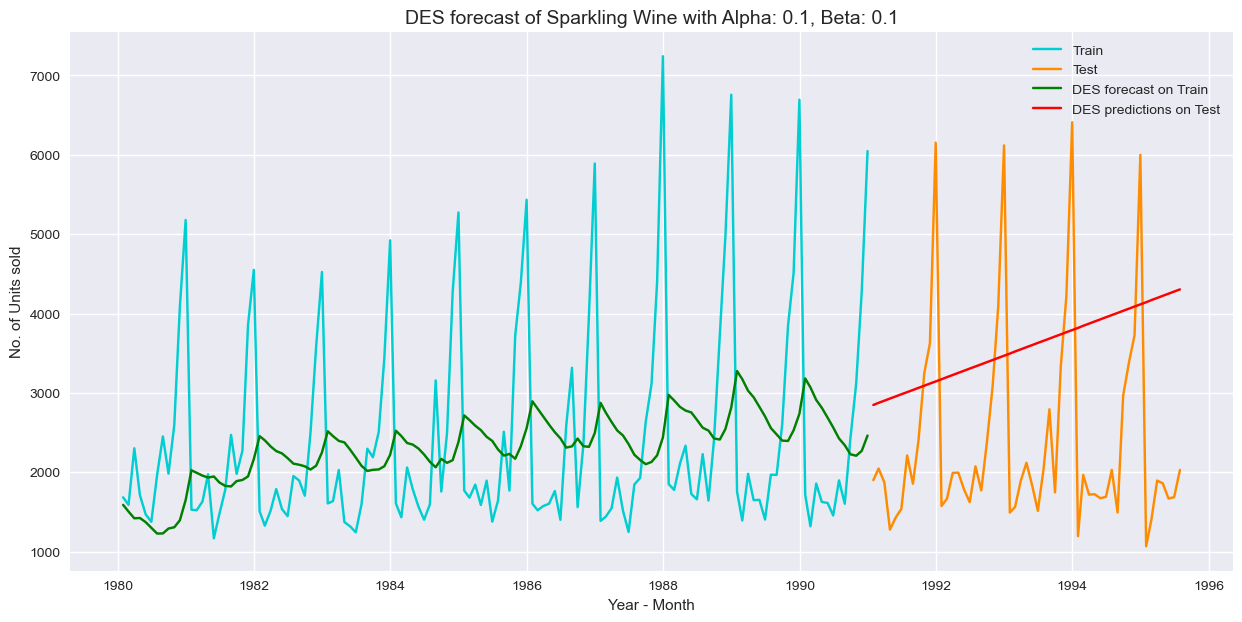

In [188]:
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_spark', 0.1, 0.1], color = 'red', label='DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('DES forecast of Sparkling Wine with Alpha: 0.1, Beta: 0.1', fontsize=14)
plt.legend(loc='best')

In [189]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [190]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [191]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_trend']
alpha_6_1 = alpha
beta_6_1 = beta

In [192]:
DES_train['predict_spark',alpha,beta] = model_DES_autofit.fittedvalues

In [193]:
DES_test['predict_spark',alpha,beta] = model_DES_autofit.forecast(len(test['Sparkling']))

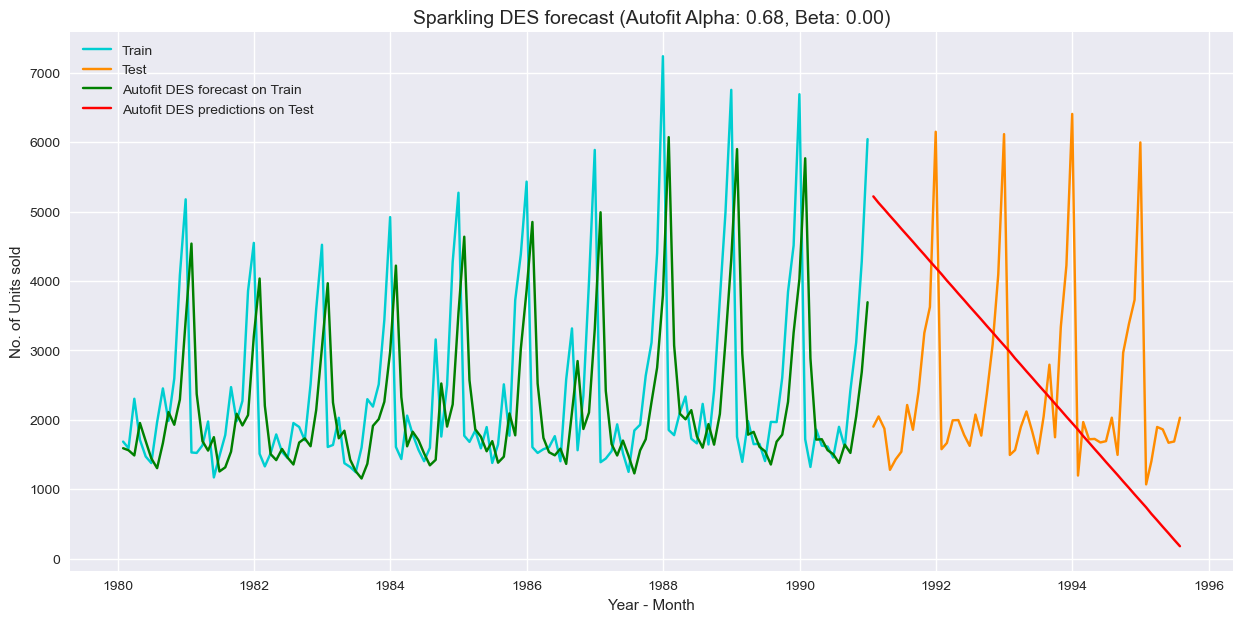

In [194]:
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_spark',alpha,beta], color = 'red', label='Autofit DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('Sparkling DES forecast (Autofit Alpha: 0.68, Beta: 0.00)', fontsize=14);
plt.legend(loc='best')

In [199]:
rmse_spark_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta],squared=False)
mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta])
        
rmse_spark_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta],squared=False)
mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta])

resultsDf_6 = pd.concat([resultsDf_6, pd.DataFrame({'Alpha': [alpha], 'Beta': [beta], 'Train RMSE': [rmse_spark_model6_train], 'Train MAPE': [mape_spark_model6_train], 'Test RMSE': [rmse_spark_model6_test], 'Test MAPE': [mape_spark_model6_test]})], ignore_index=True)

In [200]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha    Beta  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0    0.100000  0.1000  1382.52000       44.37  1778.560000      67.20
100  0.688571  0.0001  1349.65046       39.23  2007.238526      68.23
1    0.100000  0.2000  1413.60000       46.14  2599.440000      95.43
10   0.200000  0.1000  1418.04000       46.65  3611.760000     135.41
2    0.100000  0.3000  1445.76000       47.43  4293.080000     155.43

In [201]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha    Beta  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0    0.100000  0.1000  1382.52000       44.37  1778.560000      67.20
100  0.688571  0.0001  1349.65046       39.23  2007.238526      68.23
1    0.100000  0.2000  1413.60000       46.14  2599.440000      95.43
10   0.200000  0.1000  1418.04000       46.65  3611.760000     135.41
2    0.100000  0.3000  1445.76000       47.43  4293.080000     155.43

#### Model Evaluation

In [202]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][100]],
                              'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][100]]}
                           ,index=['DES Alpha 0.1,Beta 0.1','DES Alpha 0.6,Beta 0.0'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_6_1])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time      1389.135175      50.15
NaiveModel              3864.279352     152.87
SimpleAverage           1275.081804      38.90
2 point TMA              813.400684      19.70
4 point TMA             1156.589694      35.96
6 point TMA             1283.927428      43.86
9 point TMA             1346.278315      46.86
SES Alpha 0.00          1304.927405      44.48
DES Alpha 0.1,Beta 0.1  1778.560000      67.20
DES Alpha 0.6,Beta 0.0  2007.238526      68.23

#### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [203]:
TES_train = train.copy()
TES_test = test.copy()

In [204]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [207]:
resultsDf_7_1 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_spark',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_spark',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Sparkling']))
        
            rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',i,j,k],squared=False)
            mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',i,j,k])
        
            rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',i,j,k],squared=False)
            mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',i,j,k])
             
            resultsDf_7_1 = pd.concat([resultsDf_7_1, pd.DataFrame({'Alpha': [i], 'Beta': [j], 'Gamma': [k],
                                                        'Train RMSE': [rmse_spark_model7_train],
                                                        'Train MAPE': [mape_spark_model7_train],
                                                        'Test RMSE': [rmse_spark_model7_test],
                                                        'Test MAPE': [mape_spark_model7_test]})], ignore_index=True)

In [208]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
211    0.3   0.2    0.2  377.777799       11.26  314.906684      10.10
301    0.4   0.1    0.2  374.619861       11.24  315.935531      10.45
300    0.4   0.1    0.1  370.612639       11.03  318.103496      10.01
402    0.5   0.1    0.3  390.175608       11.54  325.544937       9.99
30     0.1   0.4    0.1  400.768319       11.48  331.257015      10.54

In [209]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
137    0.2   0.4    0.8  469.644813       13.45  336.712085       9.98
402    0.5   0.1    0.3  390.175608       11.54  325.544937       9.99
300    0.4   0.1    0.1  370.612639       11.03  318.103496      10.01
211    0.3   0.2    0.2  377.777799       11.26  314.906684      10.10
301    0.4   0.1    0.2  374.619861       11.24  315.935531      10.45

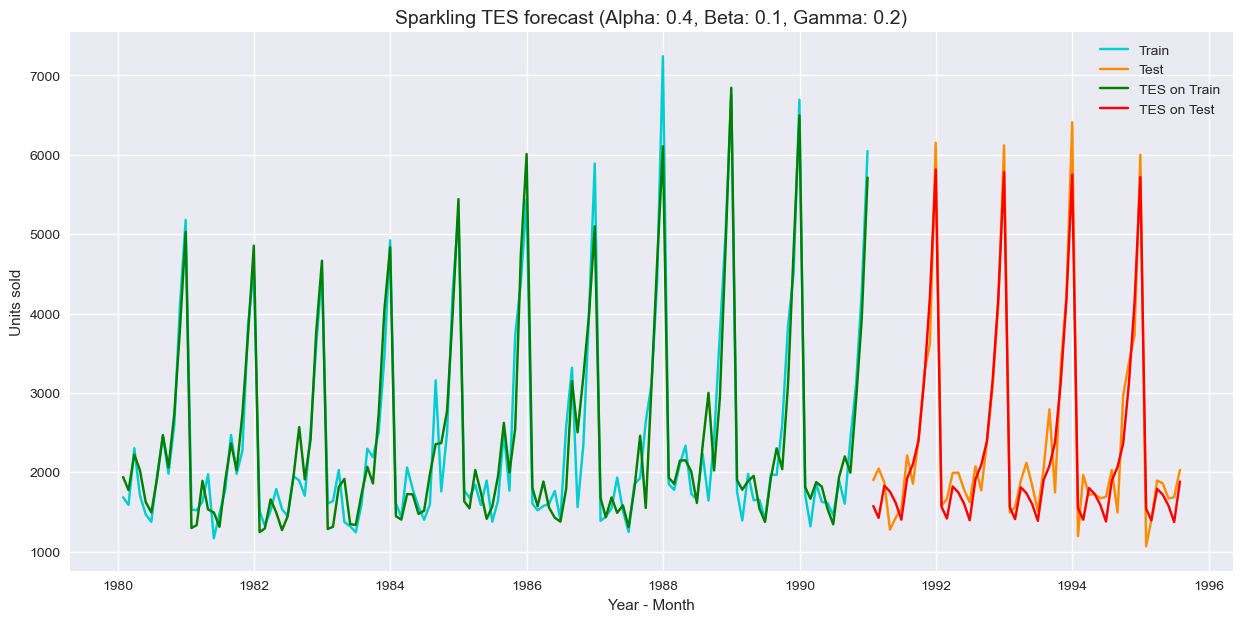

In [210]:
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark', 0.4, 0.1, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark', 0.4, 0.1, 0.2], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Alpha: 0.4, Beta: 0.1, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best')

In [211]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [212]:
model_TES_autofit.params

{'smoothing_level': 0.11133818361298699,
 'smoothing_trend': 0.049505131019509915,
 'smoothing_seasonal': 0.3620795793580111,
 'damping_trend': nan,
 'initial_level': 2356.4967888704355,
 'initial_trend': -10.187944726007238,
 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
        0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
        1.87340336, 2.37811768]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [213]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_1 = alpha
beta_7_1 = beta
gamma_7_1 = gamma

In [214]:
TES_train['predict_spark',alpha,beta,gamma] = model_TES_autofit.fittedvalues

In [215]:
TES_test['predict_spark',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Sparkling']))

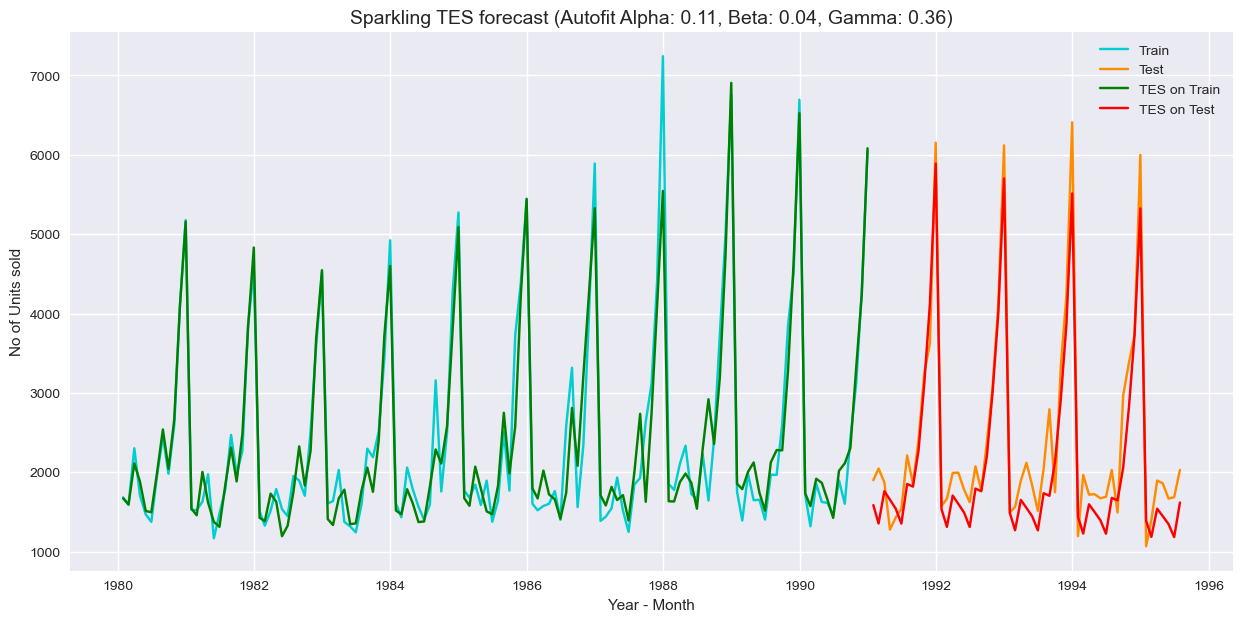

In [216]:
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('No of Units sold')
plt.title('Sparkling TES forecast (Autofit Alpha: 0.11, Beta: 0.04, Gamma: 0.36)', fontsize=14)

plt.legend(loc='best')

In [217]:
rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma])
        
rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma])
        
resultsDf_7_1 = pd.concat([resultsDf_7_1, pd.DataFrame({'Alpha': [np.round(alpha, 2)], 'Beta': [np.round(beta, 2)], 'Gamma': [np.round(gamma, 2)],
                                                        'Train RMSE': [rmse_spark_model7_train],
                                                        'Train MAPE': [mape_spark_model7_train],
                                                        'Test RMSE': [rmse_spark_model7_test],
                                                        'Test MAPE': [mape_spark_model7_test]})], ignore_index=True)

In [218]:
resultsDf_7_1.tail()

Alpha  Beta  Gamma    Train RMSE  Train MAPE     Test RMSE  Test MAPE
996    1.00  1.00   0.70  2.660015e+05     1554.57  8.649577e+06  188660.61
997    1.00  1.00   0.80  1.101923e+06     7348.46  2.700435e+05    5645.84
998    1.00  1.00   0.90  7.695708e+04     1220.71  2.472201e+05    6434.67
999    1.00  1.00   1.00  2.456050e+04      467.65  1.256914e+05    2789.45
1000   0.11  0.05   0.36  3.557668e+02       10.19  4.042868e+02      13.93

In [219]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
211    0.3   0.2    0.2  377.777799       11.26  314.906684      10.10
301    0.4   0.1    0.2  374.619861       11.24  315.935531      10.45
300    0.4   0.1    0.1  370.612639       11.03  318.103496      10.01
402    0.5   0.1    0.3  390.175608       11.54  325.544937       9.99
30     0.1   0.4    0.1  400.768319       11.48  331.257015      10.54

In [220]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
137    0.2   0.4    0.8  469.644813       13.45  336.712085       9.98
402    0.5   0.1    0.3  390.175608       11.54  325.544937       9.99
300    0.4   0.1    0.1  370.612639       11.03  318.103496      10.01
211    0.3   0.2    0.2  377.777799       11.26  314.906684      10.10
301    0.4   0.1    0.2  374.619861       11.24  315.935531      10.45

#### Model Evaluation

In [222]:
resultsDf_7_sp = pd.DataFrame({'Test RMSE': [resultsDf_7_1['Test RMSE'][301],resultsDf_7_1['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_1['Test MAPE'][301],resultsDf_7_1['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.4, Beta 0.1, Gamma 0.2','TES Alpha 0.11, Beta 0.04, Gamma 0.036'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_7_sp])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time                      1389.135175      50.15
NaiveModel                              3864.279352     152.87
SimpleAverage                           1275.081804      38.90
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
6 point TMA                             1283.927428      43.86
9 point TMA                             1346.278315      46.86
SES Alpha 0.00                          1304.927405      44.48
DES Alpha 0.1,Beta 0.1                  1778.560000      67.20
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2       315.935531      10.45
TES Alpha 0.11, Beta 0.04, Gamma 0.036   404.286809      13.93

In [223]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2       315.935531      10.45
TES Alpha 0.11, Beta 0.04, Gamma 0.036   404.286809      13.93
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
SimpleAverage                           1275.081804      38.90
6 point TMA                             1283.927428      43.86
SES Alpha 0.00                          1304.927405      44.48
9 point TMA                             1346.278315      46.86
Regression On Time                      1389.135175      50.15
DES Alpha 0.1,Beta 0.1                  1778.560000      67.20
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
NaiveModel                              3864.279352     152.87

Text(0.5, 1.0, 'SPARKLING : Forecast Vs Actual Test set')

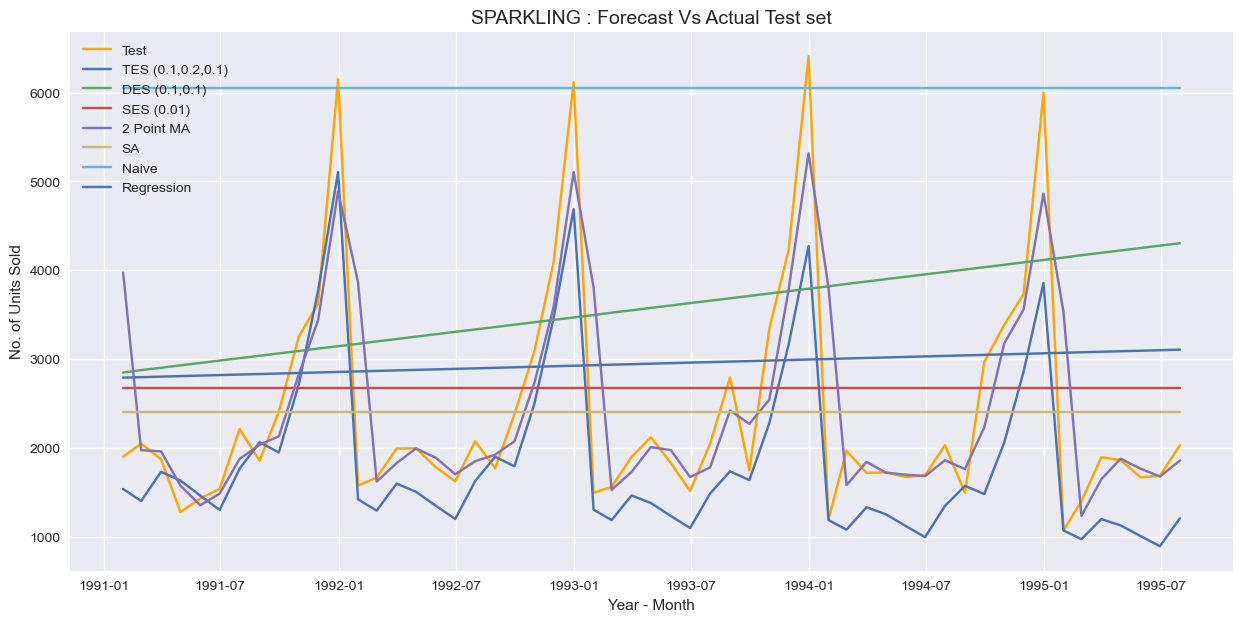

In [224]:
plt.plot(TES_test['Sparkling'], label='Test', color = 'orange')
#TES
plt.plot(TES_test['predict_spark',0.1,0.2,0.1],  label='TES (0.1,0.2,0.1)')
#DES
plt.plot(DES_test['predict_spark',0.1,0.1],  label='DES (0.1,0.1)')
#SES
plt.plot(SES_test['predict_spark'],  label='SES (0.01)')
#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['spark_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units Sold')
plt.title('SPARKLING : Forecast Vs Actual Test set', fontsize=14)

### Q5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [225]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    
    rolmean = timeseries.rolling(window=7).mean() 
    rolstd = timeseries.rolling(window=7).std()   

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

#### Original series

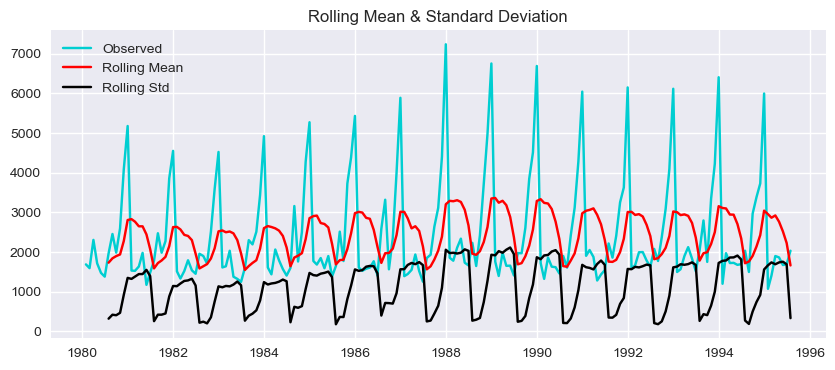

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [226]:
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'],'darkturquoise')

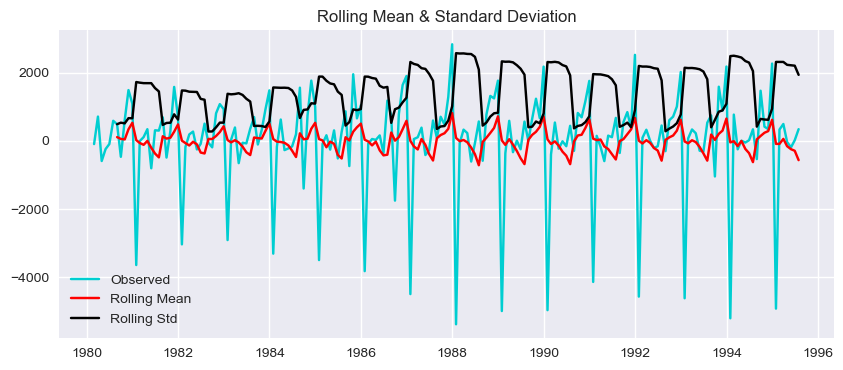

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [227]:
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'].diff().dropna(),'darkturquoise')

#### Difference of original series

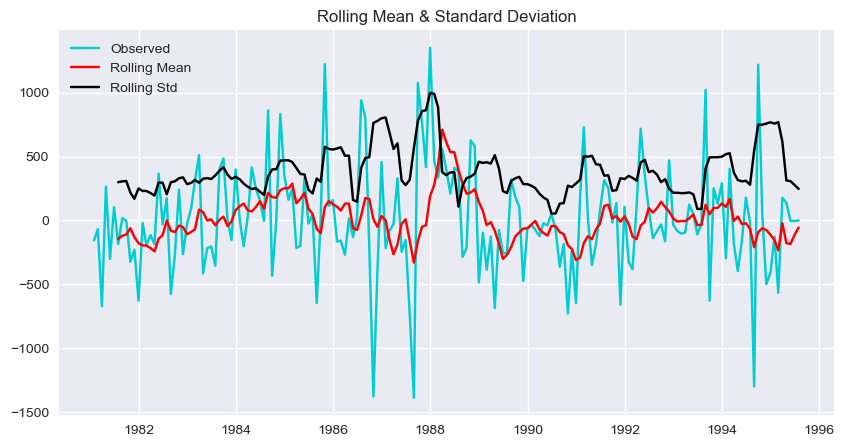

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [228]:
plt.figure(figsize=(10,5))
test_stationarity(df['Sparkling'].diff(12).dropna(), 'darkturquoise')

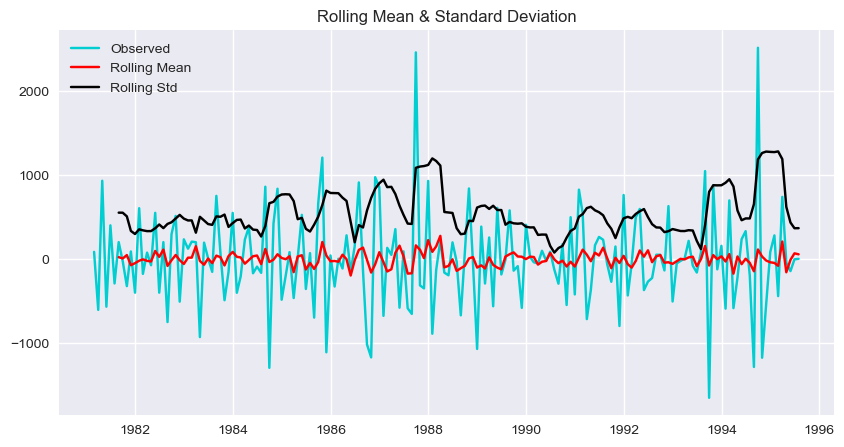

Results of Dickey-Fuller Test:
Test Statistic                  -5.113533
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [229]:
plt.figure(figsize=(10,5))
test_stationarity((df['Sparkling'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

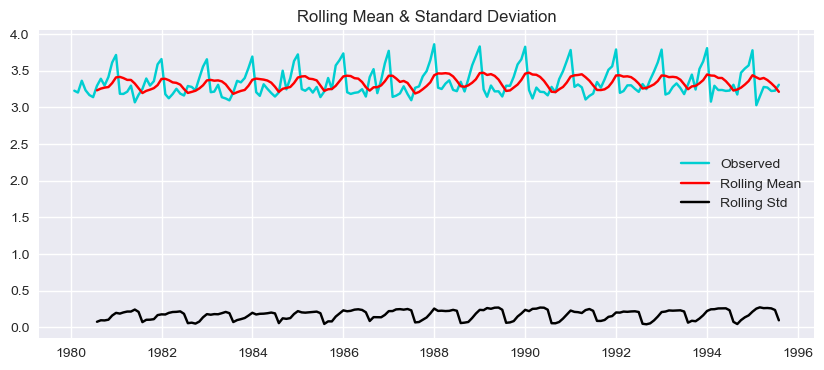

Results of Dickey-Fuller Test:
Test Statistic                  -1.749630
p-value                          0.405740
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [230]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Sparkling']), 'darkturquoise')

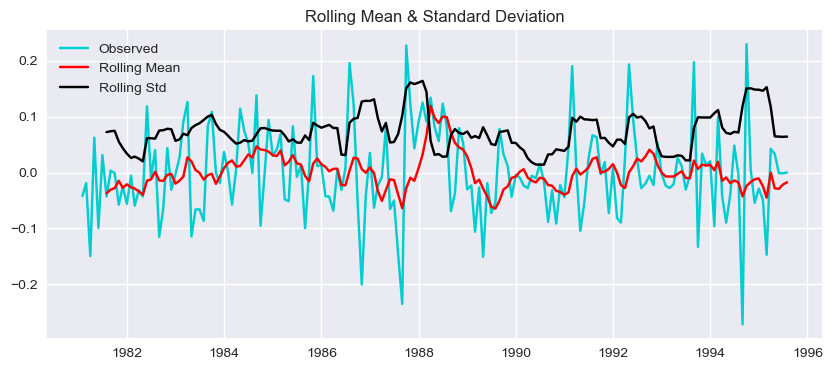

Results of Dickey-Fuller Test:
Test Statistic                  -5.183811
p-value                          0.000009
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [231]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Sparkling']).diff(12).dropna(),  'darkturquoise')

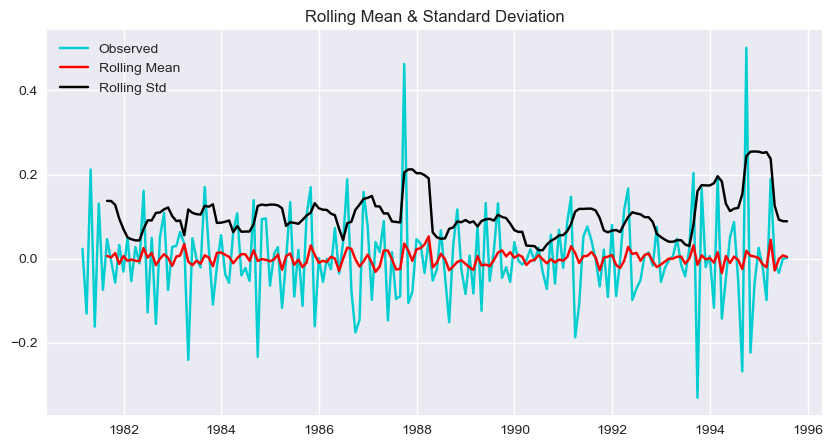

Results of Dickey-Fuller Test:
Test Statistic                  -5.254601
p-value                          0.000007
#Lags Used                      12.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64 



In [232]:
plt.figure(figsize=(10,5))
test_stationarity((np.log10(df['Sparkling']).diff(12).dropna()).diff().dropna(),  'darkturquoise')

#### Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [233]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### ACF Plots

<Figure size 1000x500 with 0 Axes>

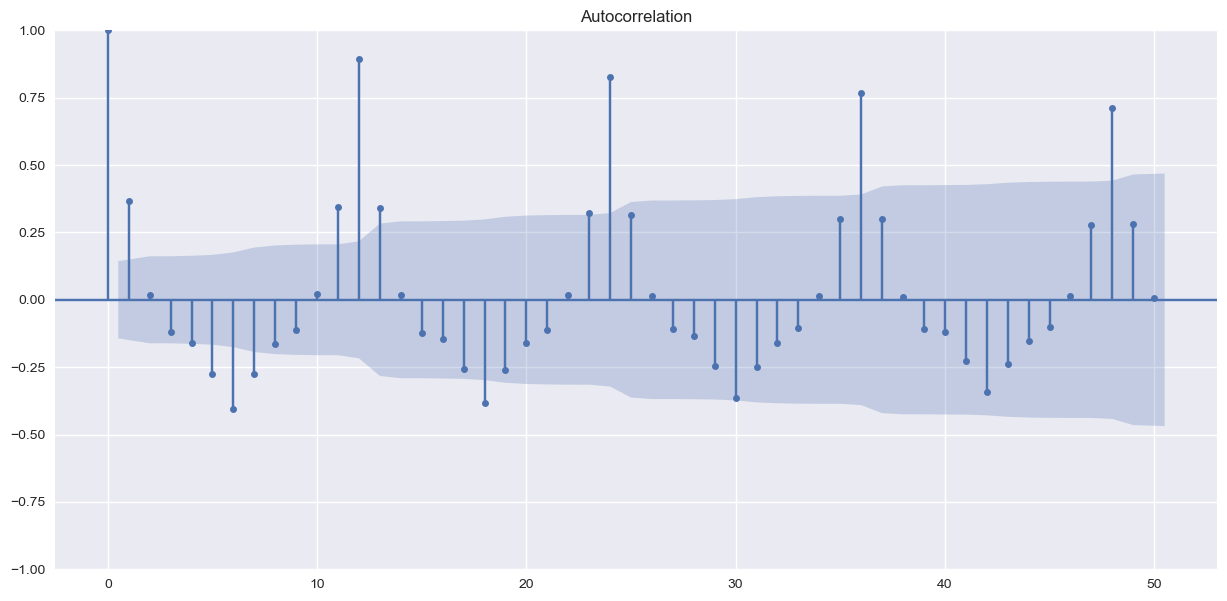

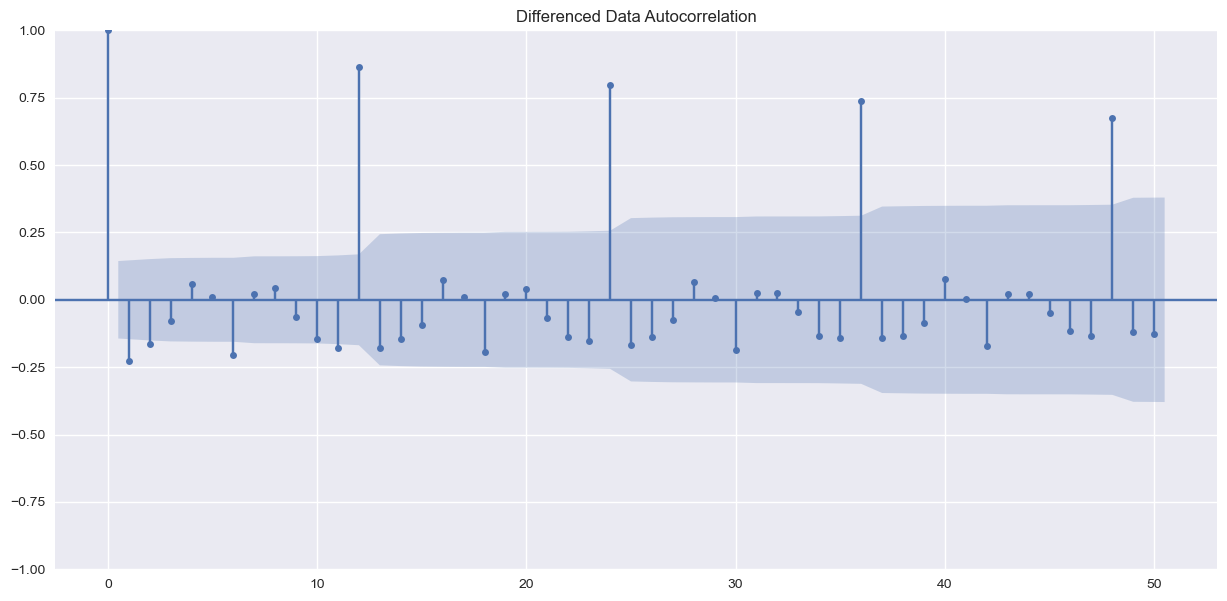

In [234]:
plt.figure(figsize=(10,5))
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

### PACF Plots

<Figure size 1000x500 with 0 Axes>

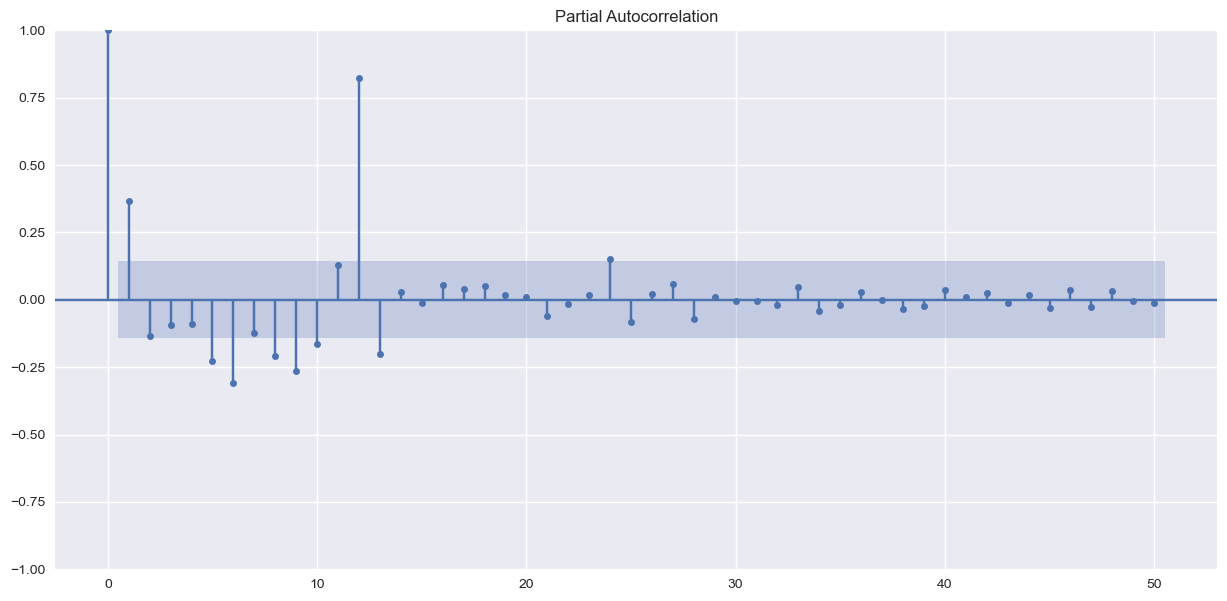

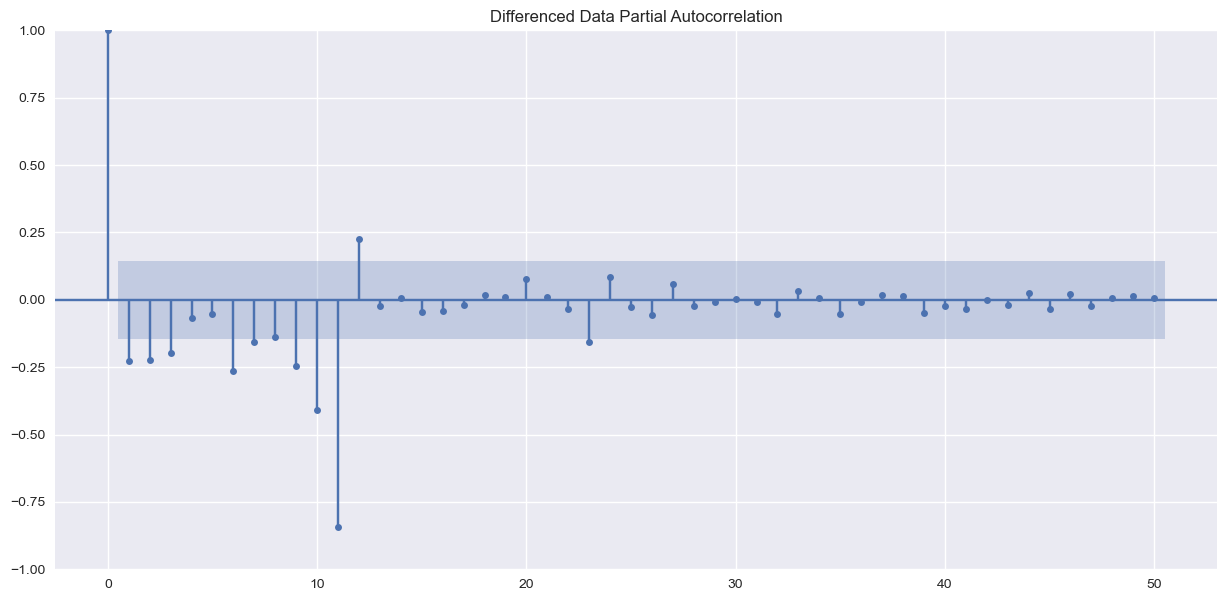

In [235]:
plt.figure(figsize=(10,5))
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## Q6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

#### Model 8: SARIMA

#### Auto SARIMA on original data

In [241]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

In [242]:
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [243]:
SARIMA_AIC_spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [245]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark = SARIMA_model_spark.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark.aic))
        SARIMA_AIC_spark = pd.concat([SARIMA_AIC_spark, pd.DataFrame([{'param': param, 'seasonal': param_seasonal, 'AIC': results_SARIMA_spark.aic}])], ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.9824851895298
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.8626334678888
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.6773574256256
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3498.6329034359856
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.377816766144
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.3243908192392
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.528962130755
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:3125.5888304991963
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.5000981866604
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.9911553658594
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:3111.3732825670554
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:1289.239819743992
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:1291.2448875094287
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:1288.6070380326591
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:1572.8459958968715
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.6565719828557
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.663923423

SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:1574.372406725534
SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:1571.857738800744
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:1401.9104199707517
SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:3201.8672128760527
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:1400.985406982226
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:1401.9924735479822
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:1403.8183455844046
SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:3450.749571943529
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:1228.3132766082795
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:1230.1483342051608
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:1230.7597822036714
SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:3476.9215102851513
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1742.2930712619816
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:1556.9467324119305
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:1384.317618064523
SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:16.0
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:1573.116864441235
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:1558.1200892480383
SARIMA(2, 1,

In [246]:
SARIMA_AIC_spark.sort_values(by=['AIC']).head()

param       seasonal   AIC
19   (0, 1, 1)  (0, 1, 3, 12)  10.0
147  (2, 1, 1)  (0, 1, 3, 12)  14.0
115  (1, 1, 3)  (0, 1, 3, 12)  16.0
163  (2, 1, 2)  (0, 1, 3, 12)  16.0
227  (3, 1, 2)  (0, 1, 3, 12)  18.0

In [247]:
SARIMA_AIC_spark.sort_values(by=['AIC']).tail()

param       seasonal          AIC
99   (1, 1, 2)  (0, 1, 3, 12)  5642.491813
179  (2, 1, 3)  (0, 1, 3, 12)  5907.916628
83   (1, 1, 1)  (0, 1, 3, 12)  6059.646811
123  (1, 1, 3)  (2, 1, 3, 12)  6120.534364
191  (2, 1, 3)  (3, 1, 3, 12)  6254.333649

In [248]:
auto_SARIMA_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark = auto_SARIMA_spark.fit(maxiter=1000)
print(results_auto_SARIMA_spark.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -596.641
Date:                             Thu, 15 Feb 2024   AIC                           1213.283
Time:                                     15:15:53   BIC                           1237.103
Sample:                                          0   HQIC                          1222.833
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6139      0.176     -9.178      0.000      -1.959      -1.269
ar.L2         -0.6117      

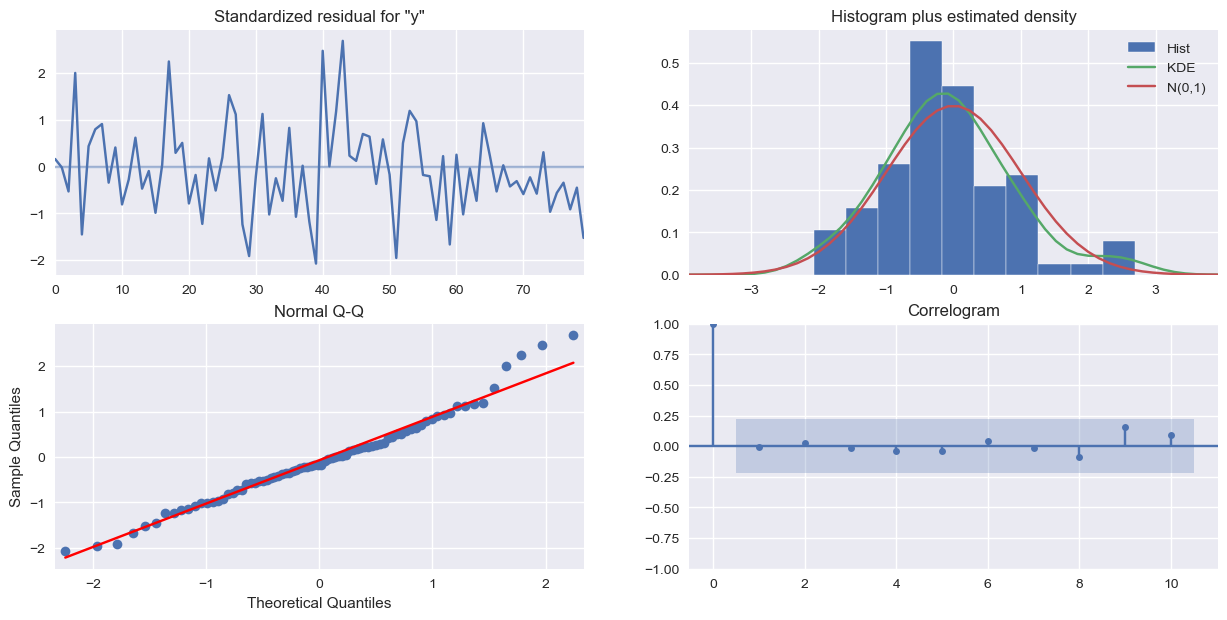

In [249]:
results_auto_SARIMA_spark.plot_diagnostics()
plt.show()

In [254]:
SARIMA_test.head()

Sparkling
YearMonth            
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

In [251]:
pred_dynamic = results_auto_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [252]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark = results_auto_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.05)

In [253]:
predicted_auto_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1431.332517  431.171013     586.252860    2276.412174
1  1540.951973  458.337551     642.626880    2439.277065
2  1708.281674  460.114653     806.473525    2610.089823
3  1859.612553  466.660771     944.974249    2774.250857
4  1502.326619  466.966123     587.089836    2417.563403

In [255]:
spark_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_forecasted'] = predicted_auto_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  spark_forecasted
YearMonth                              
1991-01-31       1902       1431.332517
1991-02-28       2049       1540.951973
1991-03-31       1874       1708.281674
1991-04-30       1279       1859.612553
1991-05-31       1432       1502.326619

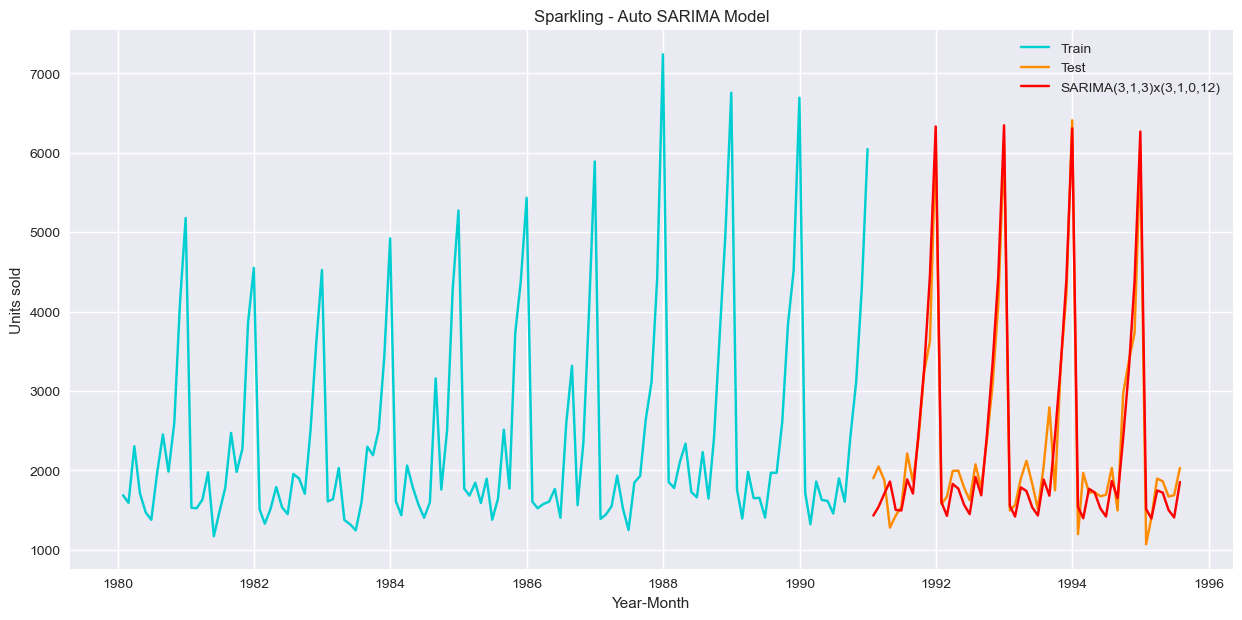

In [256]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_forecasted'], color='red', label='SARIMA(3,1,3)x(3,1,0,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best')

In [257]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 331.443 and MAPE is 10.32


In [258]:
resultsDf_8_spark1 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(3,1,3)x(3,1,0,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark1])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time                      1389.135175      50.15
NaiveModel                              3864.279352     152.87
SimpleAverage                           1275.081804      38.90
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
6 point TMA                             1283.927428      43.86
9 point TMA                             1346.278315      46.86
SES Alpha 0.00                          1304.927405      44.48
DES Alpha 0.1,Beta 0.1                  1778.560000      67.20
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2       315.935531      10.45
TES Alpha 0.11, Beta 0.04, Gamma 0.036   404.286809      13.93
Auto SARIMA(3,1,3)x(3,1,0,12)            331.443400      10.32

#### AUTO SARIMA on Log

In [259]:
spark_log_train = np.log10(SARIMA_train['Sparkling'])

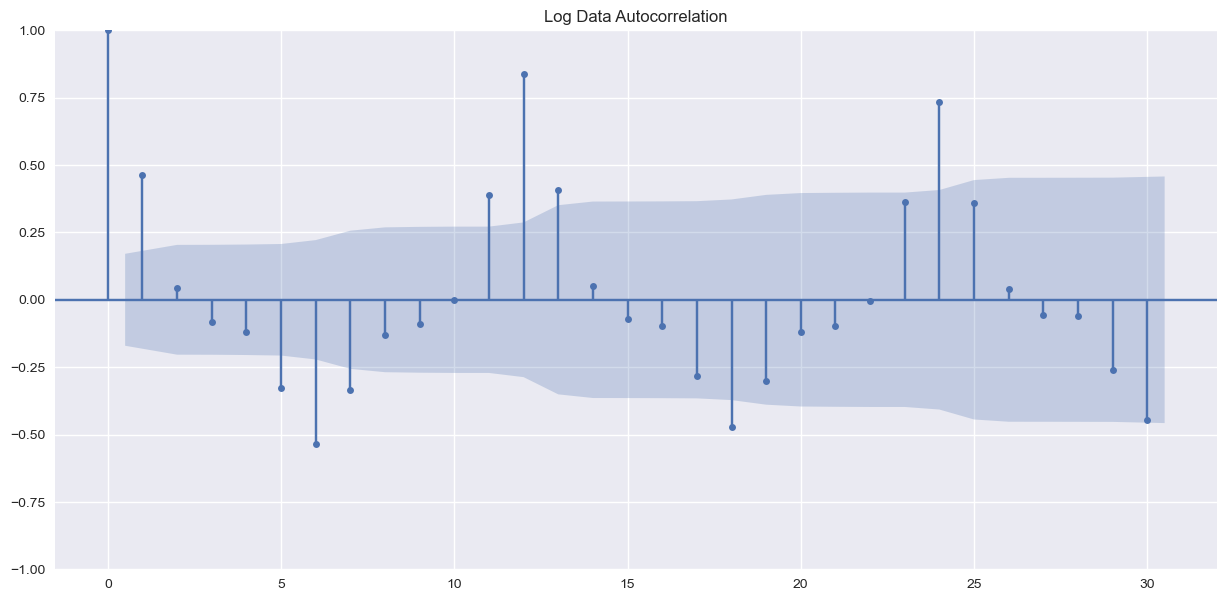

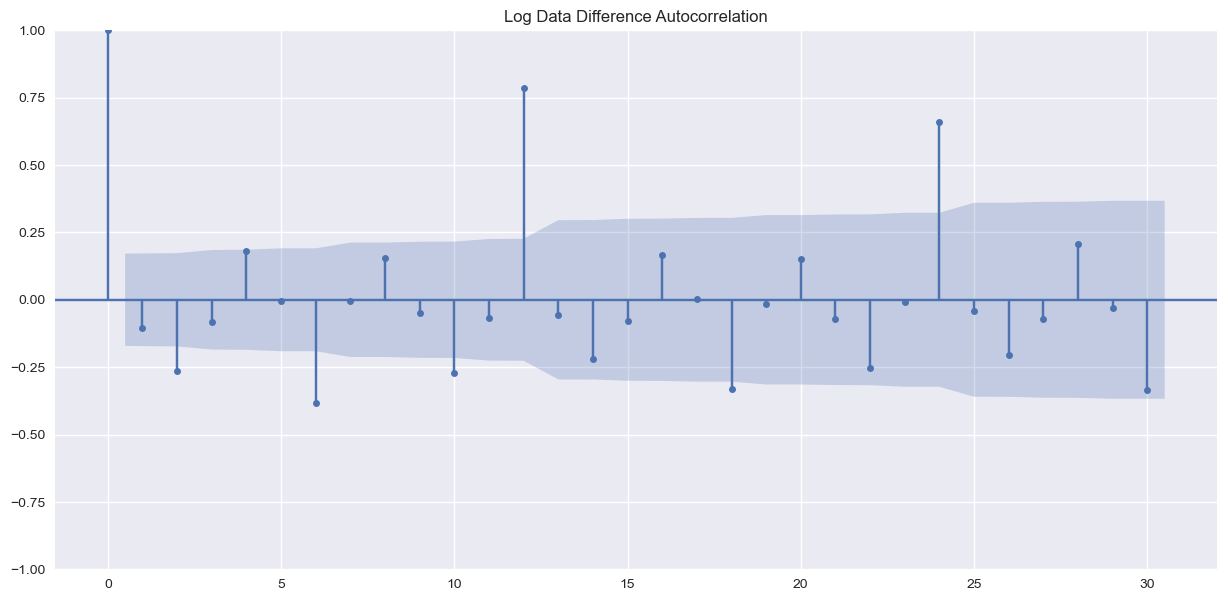

In [260]:
plot_acf(spark_log_train,lags=30,title='Log Data Autocorrelation')
plot_acf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Autocorrelation')
plt.show()

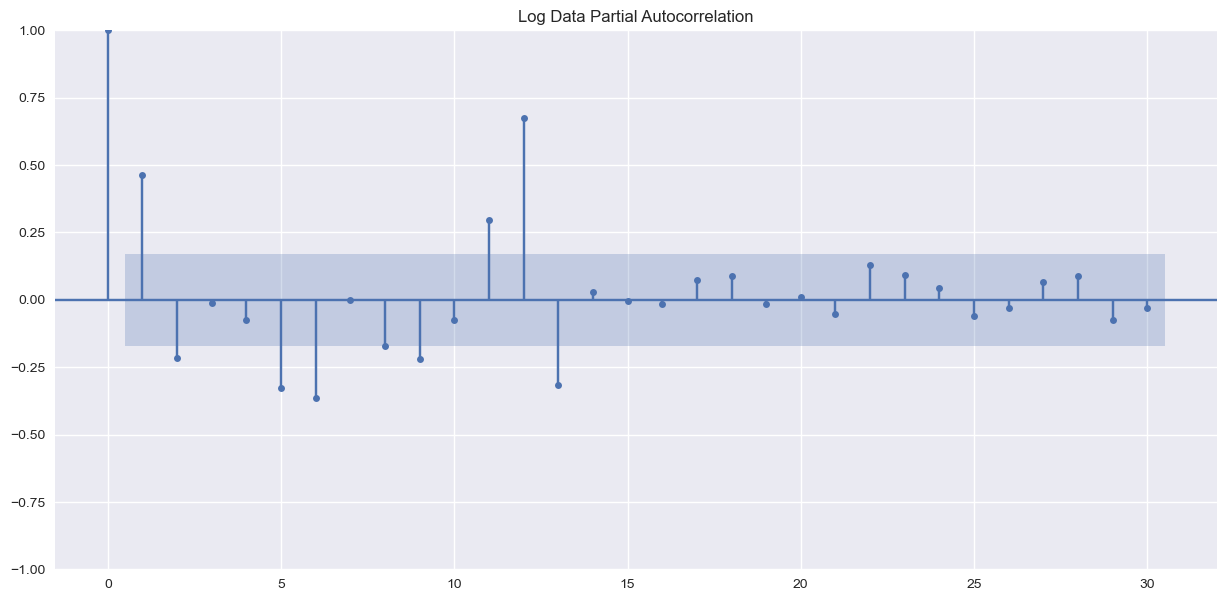

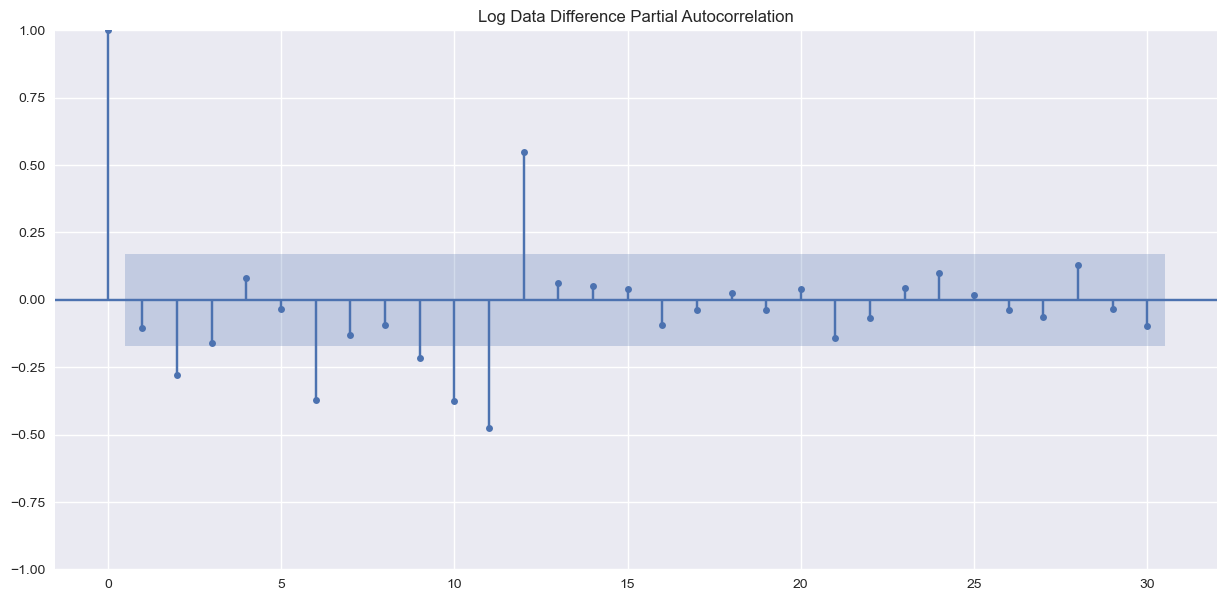

In [261]:
plot_pacf(spark_log_train,lags=30,title='Log Data Partial Autocorrelation')
plot_pacf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Partial Autocorrelation')
plt.show()

#### We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality as 12.

In [262]:
import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Some parameter combinations for Model')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Some parameter combinations for Model
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [263]:
SARIMA_AIC_spark_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [264]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark_log = SARIMA_model_spark_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark_log.aic))
        SARIMA_AIC_spark_log = pd.concat([SARIMA_AIC_spark_log, pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_SARIMA_spark_log.aic]})], ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-57.22316326227245
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.81829469978429
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.07304219597538
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-209.91064381942726
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-205.210408069403
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-175.1137823793554
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-217.95527734168542
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-225.19047184646078
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-197.41328536352466
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-200.40913589961724
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-196.67576098647834
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-173.2889254520981
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-201.15491722200665
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-199.3058031075764
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-198.59900268112733
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-177.22797543082524
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-175.2356670998703
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:-

SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:-150.71504676300475
SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:-161.9416815365459
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:-258.6037391814755
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:-246.59665092141574
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:-215.89805714908536
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:-261.3087479463544
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:-277.8803140087875
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:-239.40945483415692
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:-239.3341210824501
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:-240.349851313052
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:-214.22803461030935
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:-236.9603179070545
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:-241.34075040572742
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:-238.1020520081895
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:-211.45849416877337
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:-209.49383007072575
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:-210.1488760178756


In [265]:
SARIMA_AIC_spark_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
25   (0, 1, 1)  (1, 0, 1, 12) -284.472032
79   (1, 1, 1)  (1, 0, 1, 12) -282.517335
43   (0, 1, 2)  (1, 0, 1, 12) -281.567996
97   (1, 1, 2)  (1, 0, 1, 12) -279.611725
133  (2, 1, 1)  (1, 0, 1, 12) -278.288230

In [266]:
import statsmodels.api as sm

auto_SARIMA_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark_log = auto_SARIMA_spark_log.fit(maxiter=1000)
print(results_auto_SARIMA_spark_log.summary())


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 146.236
Date:                            Thu, 15 Feb 2024   AIC                           -284.472
Time:                                    15:34:59   BIC                           -273.423
Sample:                                01-31-1980   HQIC                          -279.986
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8966      0.045    -19.861      0.000      -0.985      -0.808
ar.S.L12       1.0112      0.020   

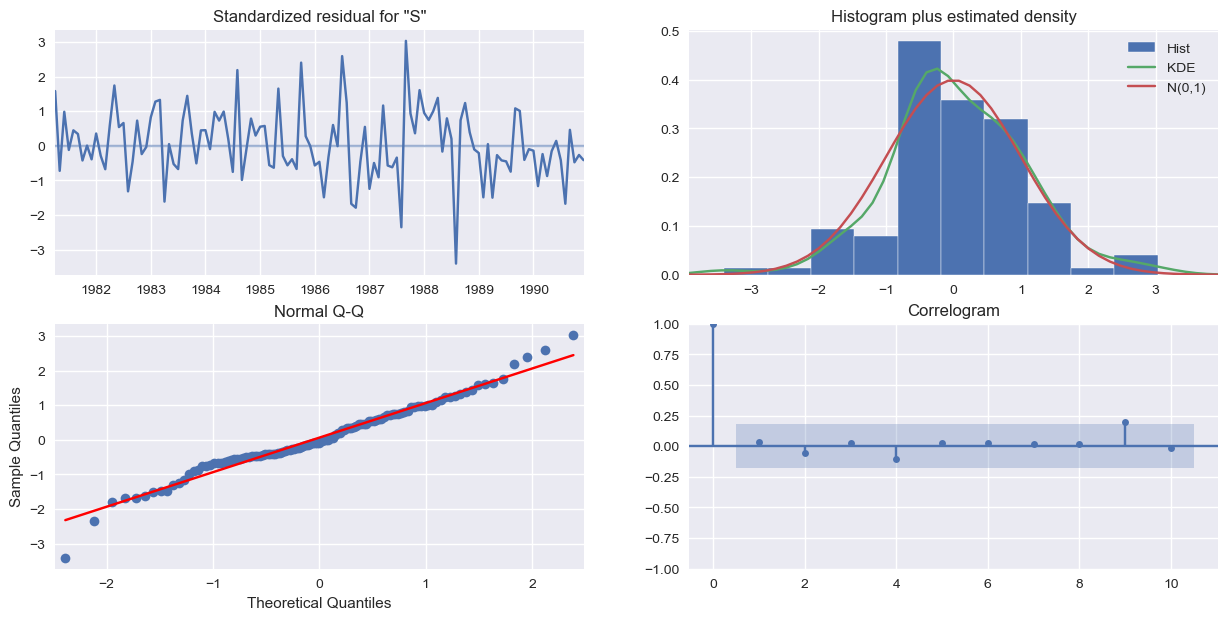

In [267]:
results_auto_SARIMA_spark_log.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model

In [268]:
SARIMA_test.head()

Sparkling  spark_forecasted
YearMonth                              
1991-01-31       1902       1431.332517
1991-02-28       2049       1540.951973
1991-03-31       1874       1708.281674
1991-04-30       1279       1859.612553
1991-05-31       1432       1502.326619

In [269]:
pred_dynamic = results_auto_SARIMA_spark_log.get_prediction(dynamic=True, full_results=True)

In [270]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark_log = results_auto_SARIMA_spark_log.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.1)

In [271]:
predicted_auto_SARIMA_spark_log.summary_frame(alpha=0.05).head()

Sparkling       mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  3.212029  0.067109       3.080498       3.343560
1991-02-28  3.141306  0.067466       3.009076       3.273536
1991-03-31  3.256284  0.067821       3.123356       3.389211
1991-04-30  3.226731  0.068175       3.093110       3.360352
1991-05-31  3.195785  0.068527       3.061474       3.330097

In [272]:
spark_log_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_log_forecasted'] = np.power(10, predicted_auto_SARIMA_spark_log.predicted_mean)
SARIMA_test.head()

Sparkling  spark_forecasted  spark_log_forecasted
YearMonth                                                    
1991-01-31       1902       1431.332517           1629.404149
1991-02-28       2049       1540.951973           1384.541742
1991-03-31       1874       1708.281674           1804.196824
1991-04-30       1279       1859.612553           1685.508515
1991-05-31       1432       1502.326619           1569.586986

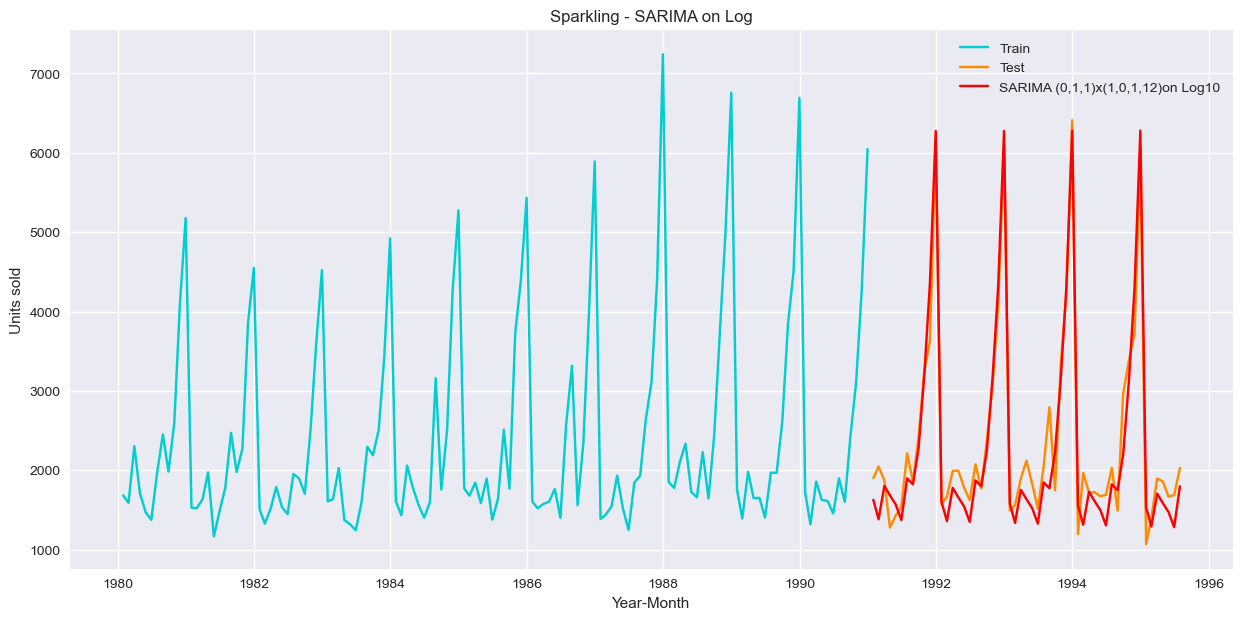

In [273]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_log_forecasted'], color='red', label='SARIMA (0,1,1)x(1,0,1,12)on Log10')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - SARIMA on Log')
plt.legend(loc='best')

In [274]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_log_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_log_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 336.811 and MAPE is 11.19


In [275]:
resultsDf_8_spark2 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(0,1,1)x(1,0,1,12)-Log10'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark2])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time                      1389.135175      50.15
NaiveModel                              3864.279352     152.87
SimpleAverage                           1275.081804      38.90
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
6 point TMA                             1283.927428      43.86
9 point TMA                             1346.278315      46.86
SES Alpha 0.00                          1304.927405      44.48
DES Alpha 0.1,Beta 0.1                  1778.560000      67.20
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2       315.935531      10.45
TES Alpha 0.11, Beta 0.04, Gamma 0.036   404.286809      13.93
Auto SARIMA(3,1,3)x(3,1,0,12)            331.443400      10.32
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10      336.810981      11.19

## Q7.	Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

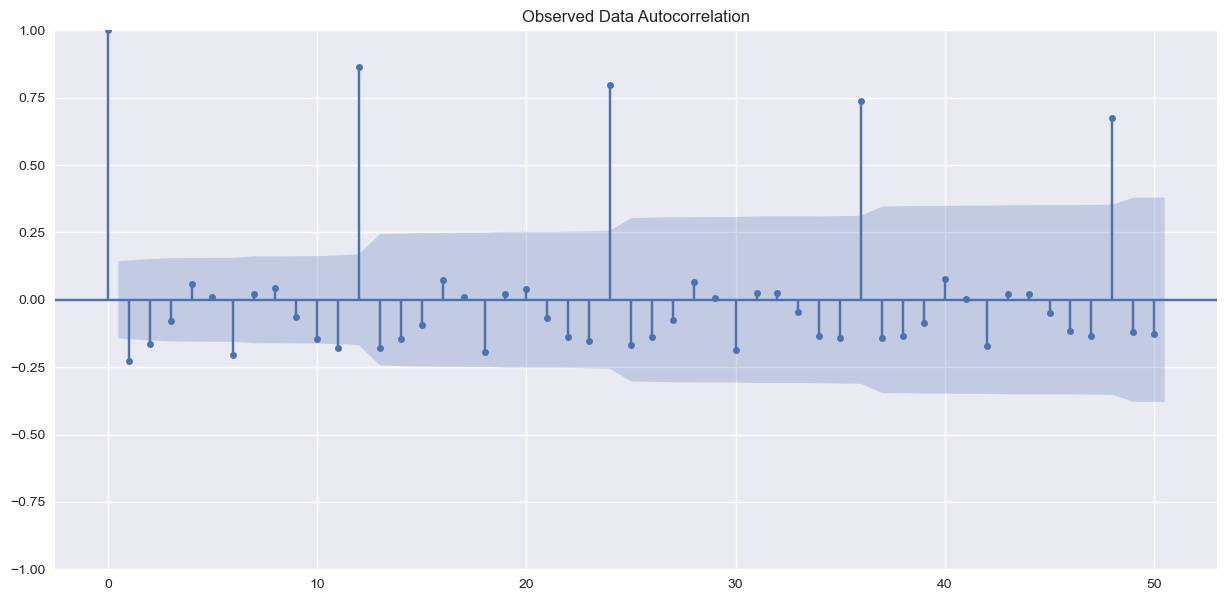

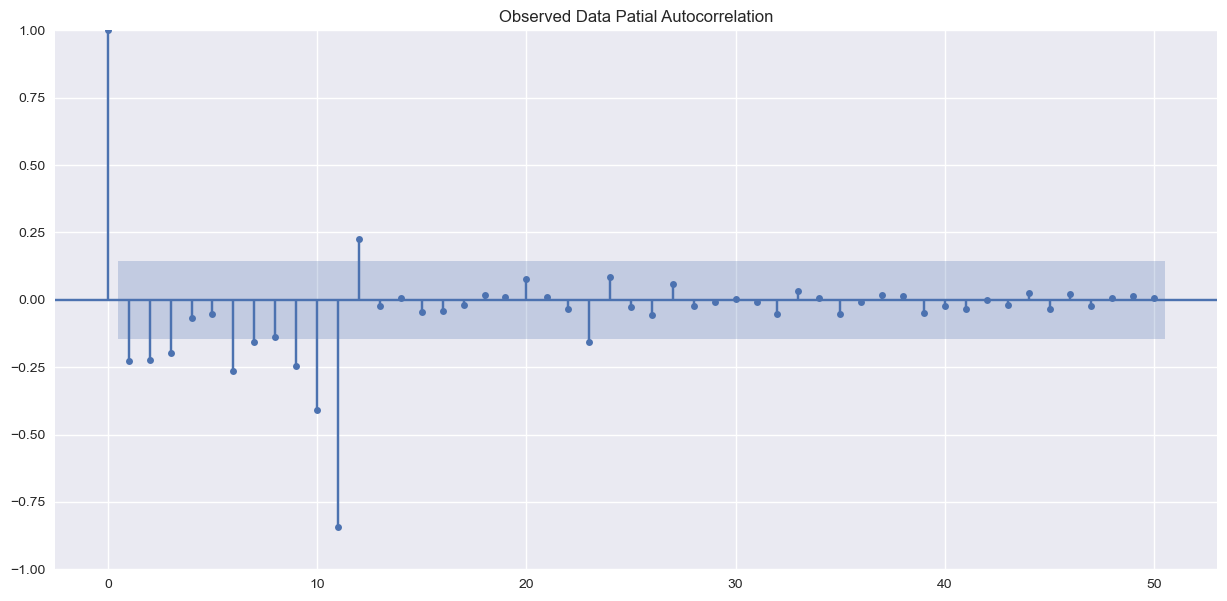

In [276]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

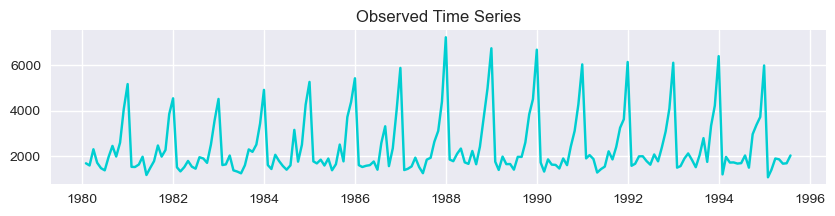

In [277]:
plt.figure(figsize=(10,2))
plt.plot(df['Sparkling'], color = 'darkturquoise')
plt.title ('Observed Time Series');

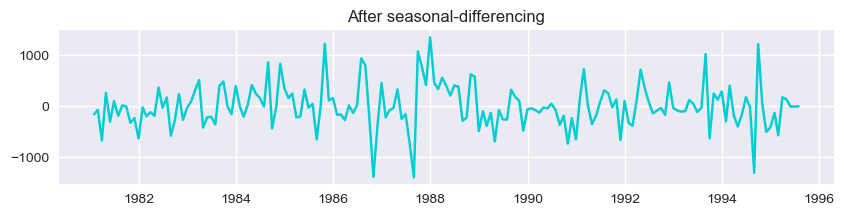

In [278]:
plt.figure(figsize=(10,2))
plt.plot(df['Sparkling'].diff(12).dropna(), color = 'darkturquoise')
plt.title ('After seasonal-differencing');

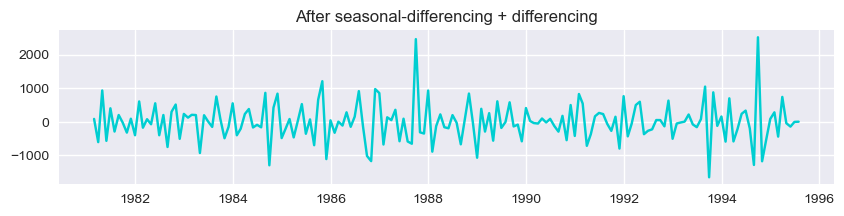

In [279]:
plt.figure(figsize=(10,2))
plt.plot((df['Sparkling'].diff(12).dropna()).diff().dropna(),  color = 'darkturquoise')
plt.title ('After seasonal-differencing + differencing');

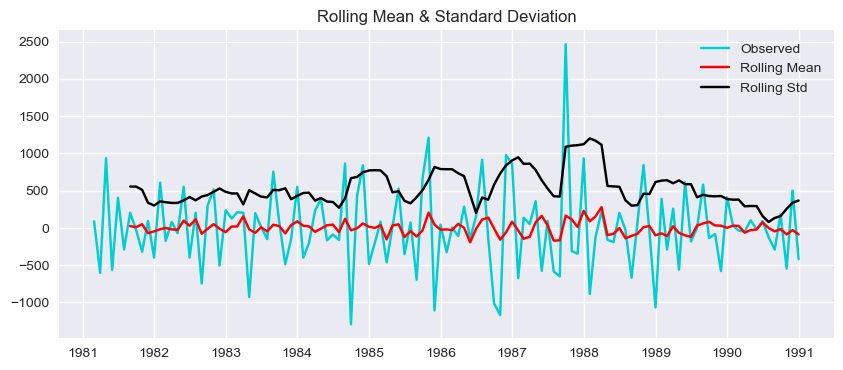

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [280]:
plt.figure(figsize=(10,4))
test_stationarity((SARIMA_train['Sparkling'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

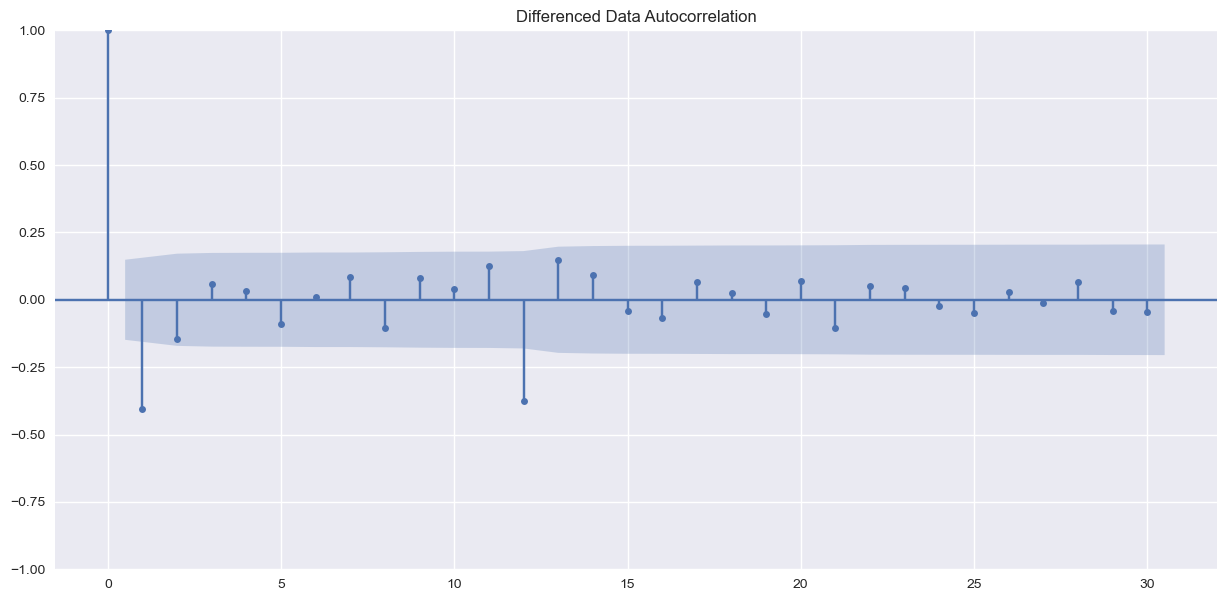

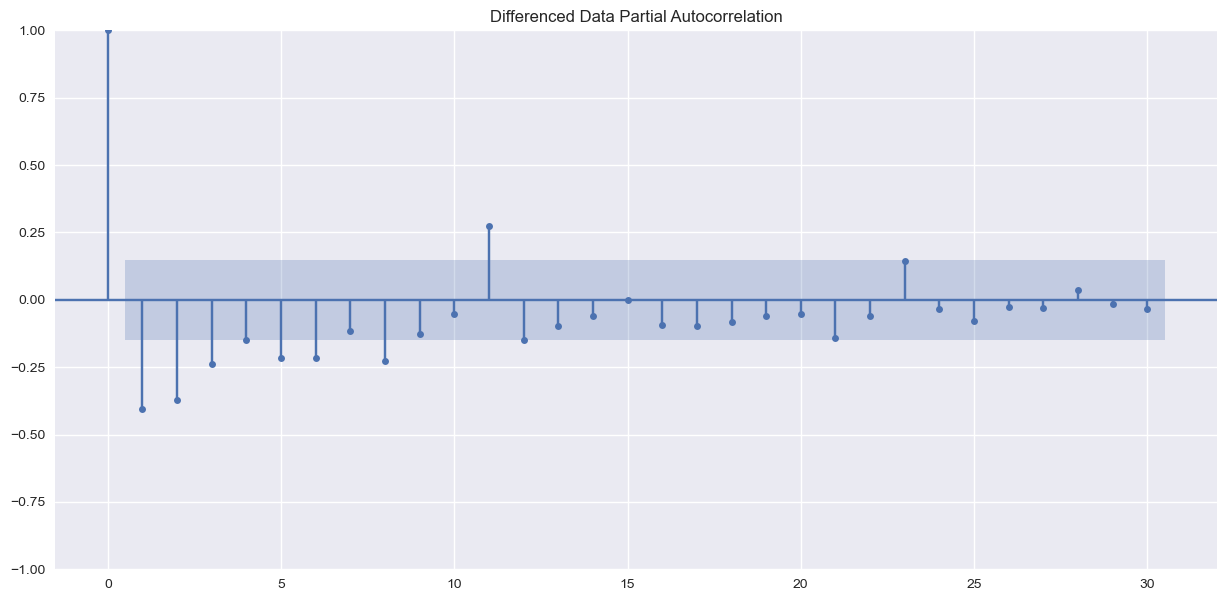

In [281]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Autocorrelation')
plot_pacf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Partial Autocorrelation');

In [282]:
import statsmodels.api as sm

manual_SARIMA_spark = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),#(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),#(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark = manual_SARIMA_spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())
print("Model Summary-SARIMA (3,1,3)X(3,1,0,12)")

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -693.697
Date:                                 Thu, 15 Feb 2024   AIC                           1403.394
Time:                                         15:51:31   BIC                           1423.654
Sample:                                              0   HQIC                          1411.574
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.713      0.087      -0.032       0

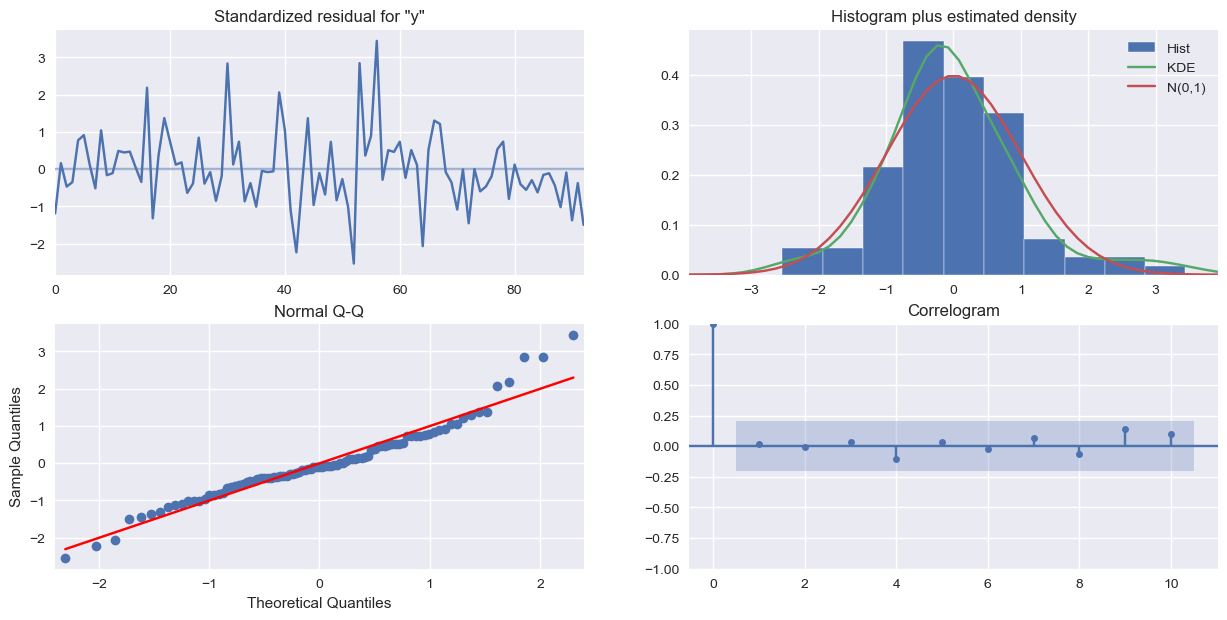

In [283]:
results_manual_SARIMA_spark.plot_diagnostics()
plt.show()

In [284]:
pred_dynamic = results_manual_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [285]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_spark = results_manual_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.5)

In [286]:
predicted_manual_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1579.912285  416.594728     763.401622    2396.422949
1  1419.158355  429.114231     578.109918    2260.206793
2  1868.148600  429.104871    1027.118507    2709.178693
3  1731.475932  430.973418     886.783555    2576.168309
4  1659.826535  431.906350     813.305644    2506.347426

In [287]:
spark_manual_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_manual_forecasted'] = predicted_manual_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  spark_forecasted  spark_log_forecasted  \
YearMonth                                                       
1991-01-31       1902       1431.332517           1629.404149   
1991-02-28       2049       1540.951973           1384.541742   
1991-03-31       1874       1708.281674           1804.196824   
1991-04-30       1279       1859.612553           1685.508515   
1991-05-31       1432       1502.326619           1569.586986   

            spark_manual_forecasted  
YearMonth                            
1991-01-31              1579.912285  
1991-02-28              1419.158355  
1991-03-31              1868.148600  
1991-04-30              1731.475932  
1991-05-31              1659.826535

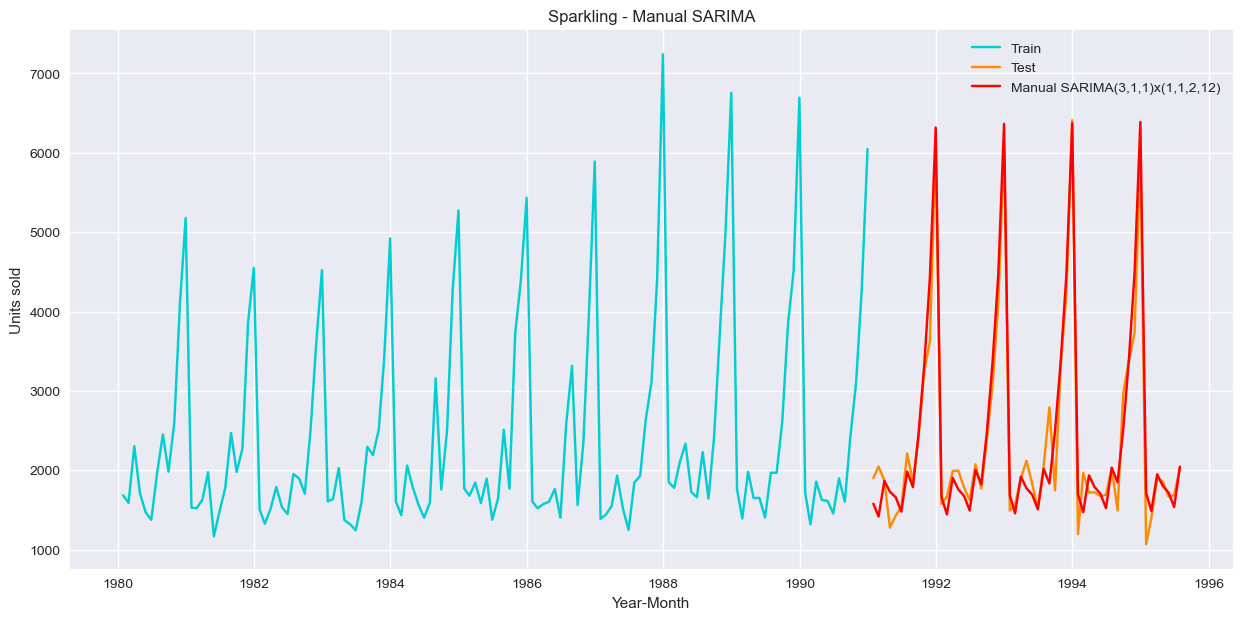

In [288]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_manual_forecasted'], color='red', label='Manual SARIMA(3,1,1)x(1,1,2,12)')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - Manual SARIMA')
plt.legend(loc='best')

In [289]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_manual_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_manual_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 324.108 and MAPE is 9.48


In [290]:
resultsDf_8_spark3 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Manual SARIMA(3,1,1)x(1,1,2,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark3])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time                      1389.135175      50.15
NaiveModel                              3864.279352     152.87
SimpleAverage                           1275.081804      38.90
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
6 point TMA                             1283.927428      43.86
9 point TMA                             1346.278315      46.86
SES Alpha 0.00                          1304.927405      44.48
DES Alpha 0.1,Beta 0.1                  1778.560000      67.20
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2       315.935531      10.45
TES Alpha 0.11, Beta 0.04, Gamma 0.036   404.286809      13.93
Auto SARIMA(3,1,3)x(3,1,0,12)            331.443400      10.32
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10      336.810981      11.19
Manual SARIMA(3,1,1)x(1,1,2,12)          324.107954       9.48

## Q9.	Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [291]:
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time                      1389.135175      50.15
NaiveModel                              3864.279352     152.87
SimpleAverage                           1275.081804      38.90
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
6 point TMA                             1283.927428      43.86
9 point TMA                             1346.278315      46.86
SES Alpha 0.00                          1304.927405      44.48
DES Alpha 0.1,Beta 0.1                  1778.560000      67.20
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2       315.935531      10.45
TES Alpha 0.11, Beta 0.04, Gamma 0.036   404.286809      13.93
Auto SARIMA(3,1,3)x(3,1,0,12)            331.443400      10.32
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10      336.810981      11.19
Manual SARIMA(3,1,1)x(1,1,2,12)          324.107954       9.48

## Q9.	Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

##### Sorting the results from all the models

In [292]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2       315.935531      10.45
Manual SARIMA(3,1,1)x(1,1,2,12)          324.107954       9.48
Auto SARIMA(3,1,3)x(3,1,0,12)            331.443400      10.32
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10      336.810981      11.19
TES Alpha 0.11, Beta 0.04, Gamma 0.036   404.286809      13.93
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
SimpleAverage                           1275.081804      38.90
6 point TMA                             1283.927428      43.86
SES Alpha 0.00                          1304.927405      44.48
9 point TMA                             1346.278315      46.86
Regression On Time                      1389.135175      50.15
DES Alpha 0.1,Beta 0.1                  1778.560000      67.20
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
NaiveModel                              3864.279352     152.87

In [293]:
spark_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
Manual SARIMA(3,1,1)x(1,1,2,12)          324.107954       9.48
Auto SARIMA(3,1,3)x(3,1,0,12)            331.443400      10.32
TES Alpha 0.4, Beta 0.1, Gamma 0.2       315.935531      10.45
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10      336.810981      11.19
TES Alpha 0.11, Beta 0.04, Gamma 0.036   404.286809      13.93
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
SimpleAverage                           1275.081804      38.90
6 point TMA                             1283.927428      43.86
SES Alpha 0.00                          1304.927405      44.48
9 point TMA                             1346.278315      46.86
Regression On Time                      1389.135175      50.15
DES Alpha 0.1,Beta 0.1                  1778.560000      67.20
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
NaiveModel                              3864.279352     152.87

Text(0.5, 1.0, 'SPARKLING : Forecasts Vs Test Data')

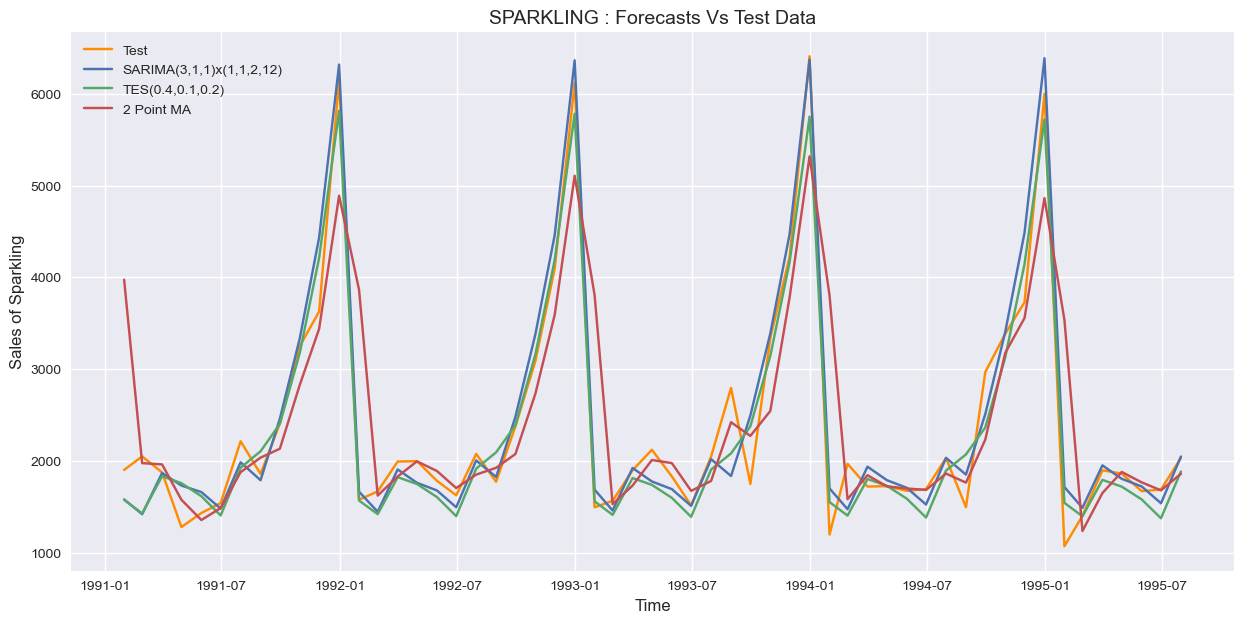

In [294]:
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')
#SARIMA
plt.plot(SARIMA_test['spark_manual_forecasted'],  label='SARIMA(3,1,1)x(1,1,2,12)')
#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES(0.4,0.1,0.2)')
#DES

#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')
plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : Forecasts Vs Test Data', fontsize=14)

#### Building model on all of the dataset using best model, which is TES

In [295]:
model_TES_spark = ExponentialSmoothing(df['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_spark_fit = model_TES_spark.fit(smoothing_level=0.4,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_spark_forecast = model_TES_spark_fit.forecast(steps=12)

In [296]:
rmse_spark_tes_full = metrics.mean_squared_error(df['Sparkling'],model_TES_spark_fit.fittedvalues,squared=False)
mape_spark_tes_full = MAPE(df['Sparkling'],model_TES_spark_fit.fittedvalues)
print("TES forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_tes_full, mape_spark_tes_full))

TES forecast on the Sparkling Full Data:  RMSE is 376.775 and MAPE is 11.29


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast using TES Model')

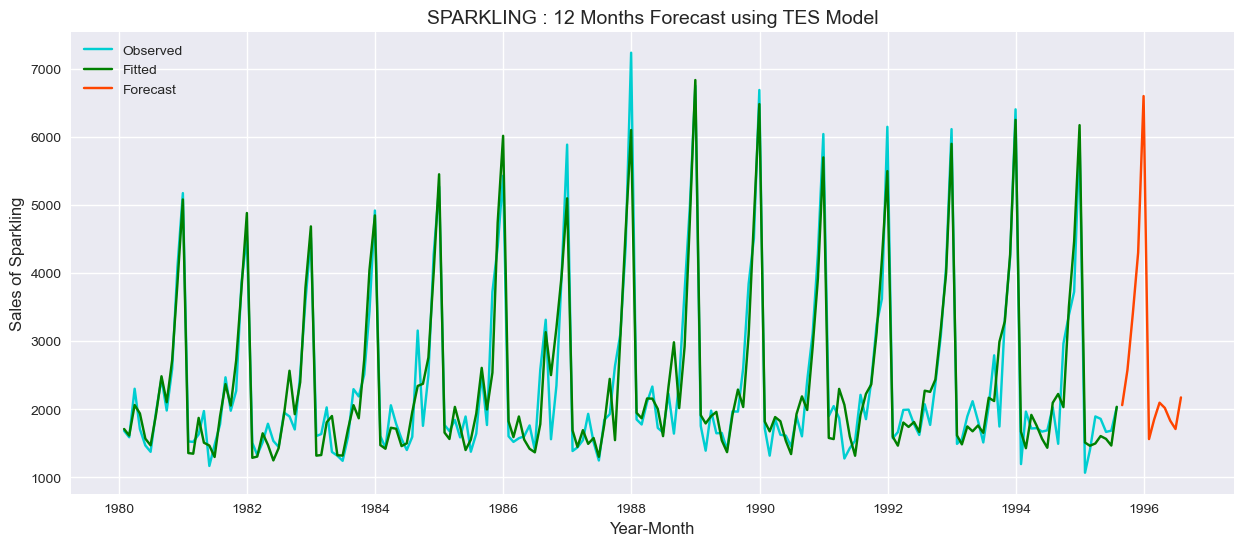

In [297]:
plt.figure(figsize=(15,6))

plt.plot(df['Sparkling'], label='Observed', color = 'darkturquoise')
plt.plot(model_TES_spark_fit.fittedvalues, label='Fitted', color = 'green')
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.legend(loc='upper left')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using TES Model', fontsize=14)

Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

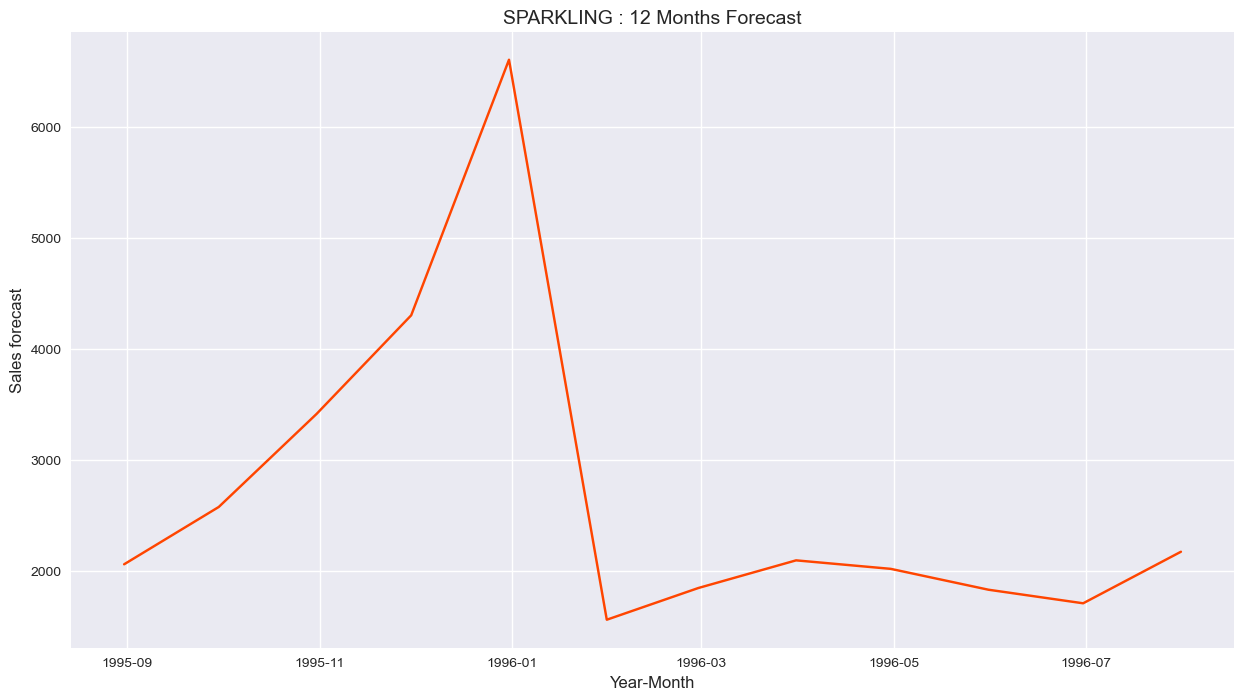

In [300]:
plt.figure(figsize=(15,8))
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast', fontsize=14)

#### Attempt SARIMA(3,1,1)x(1,1,2,12) for forecast

In [301]:
spark_full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_spark = spark_full_data_model.fit(maxiter=1000)
print(results_full_data_model_spark.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1078.437
Date:                                 Thu, 15 Feb 2024   AIC                           2176.875
Time:                                         17:00:08   BIC                           2206.711
Sample:                                     01-31-1980   HQIC                          2188.998
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4229      0.086     -4.916      0.000      -0.592      -0

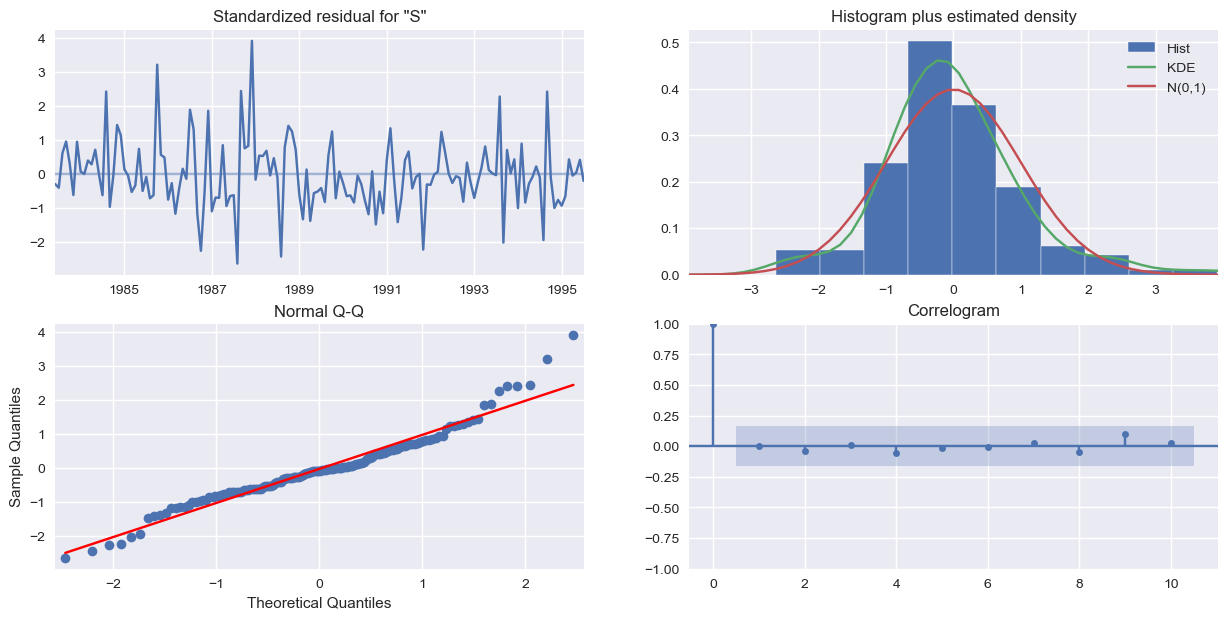

In [302]:
rcParams['figure.figsize'] = 15,7
results_full_data_model_spark.plot_diagnostics();

In [303]:
predicted_spark_SARIMA_full_data = results_full_data_model_spark.get_forecast(steps=12)

In [304]:
predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1873.502144  384.465741    1119.963139    2627.041149
1995-09-30  2444.983038  389.475609    1681.624871    3208.341204
1995-10-31  3312.750975  390.169736    2548.032345    4077.469605
1995-11-30  3994.642448  390.678435    3228.926785    4760.358111
1995-12-31  6084.263618  390.808101    5318.293815    6850.233422

In [305]:
rmse_spark_sarima_full = metrics.mean_squared_error(df['Sparkling'],results_full_data_model_spark.fittedvalues,squared=False)
mape_spark_sarima_full = MAPE(df['Sparkling'],results_full_data_model_spark.fittedvalues)
print("For SARIMA forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_sarima_full, mape_spark_sarima_full))

For SARIMA forecast on the Sparkling Full Data:  RMSE is 591.250 and MAPE is 14.86


In [306]:
df.tail()

Sparkling
YearMonth            
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [307]:
pred_full_manual_SARIMA_date = predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

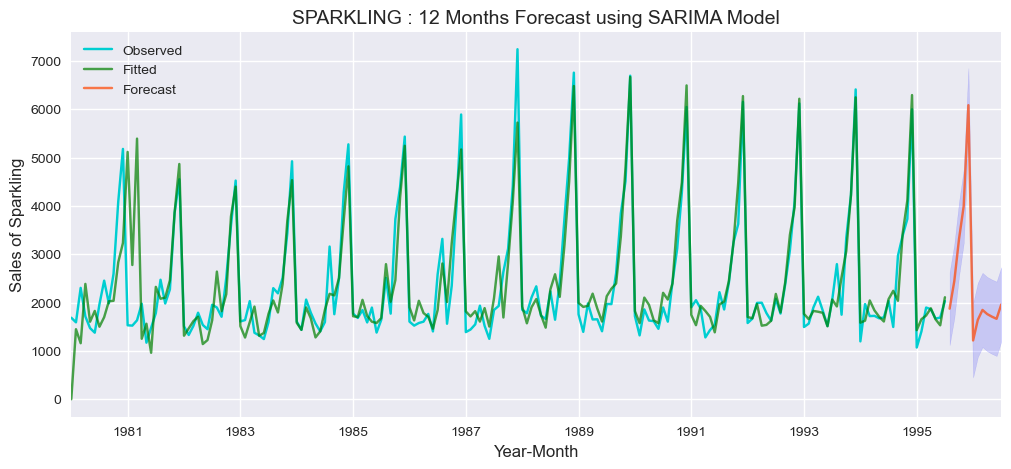

In [308]:
plt.figure(figsize=(12,5))

axis = df['Sparkling'].plot(label='Observed', color = 'darkturquoise')
results_full_data_model_spark.fittedvalues.plot(ax=axis, label='Fitted', alpha=0.7, color = 'green')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

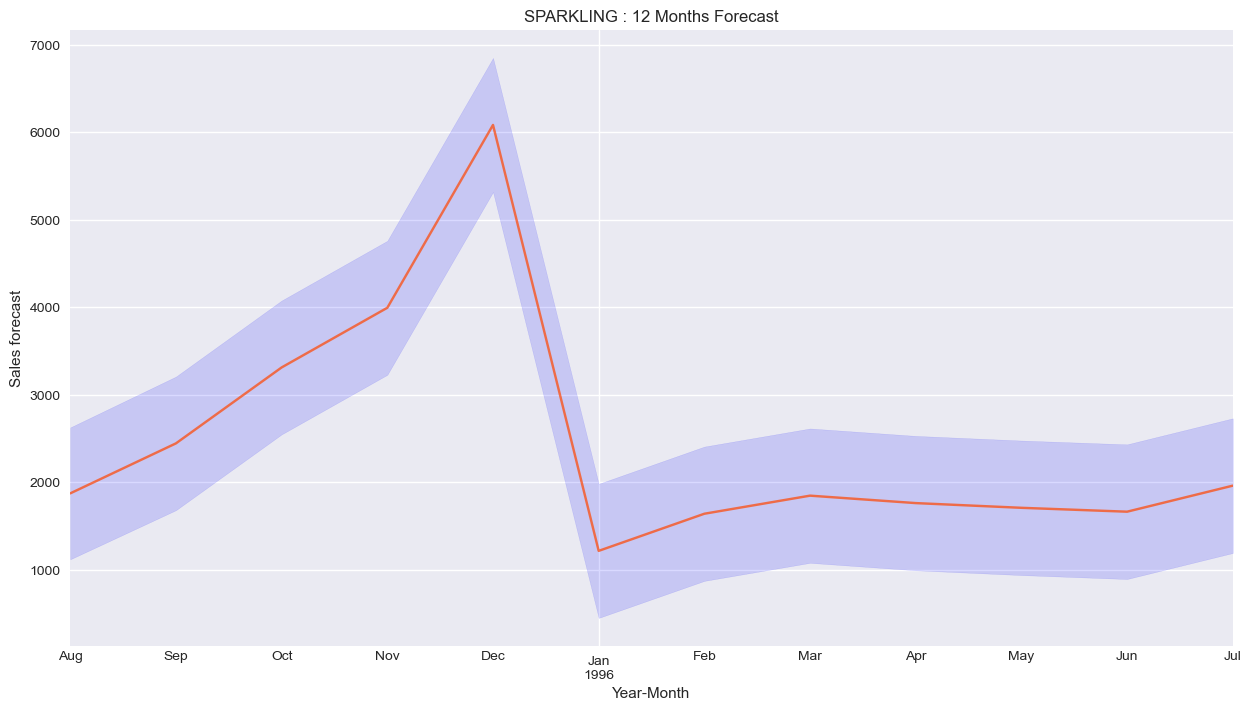

In [309]:
plt.figure(figsize=(15,8))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12 Months Forecast', fontsize=12)

In [310]:
forecast = pd.DataFrame({'Sparkling':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

Sparkling
1995-08-31    1873.50
1995-09-30    2444.98
1995-10-31    3312.75
1995-11-30    3994.64
1995-12-31    6084.26
1996-01-31    1216.22
1996-02-29    1640.64
1996-03-31    1847.29
1996-04-30    1762.22
1996-05-31    1708.40
1996-06-30    1663.96
1996-07-31    1961.47

In [311]:
np.sum(forecast['Sparkling'])

29510.33

In [312]:
forecast.describe()

Sparkling
count    12.000000
mean   2459.194167
std    1384.640665
min    1216.220000
25%    1697.290000
50%    1860.395000
75%    2661.922500
max    6084.260000

## Q10.	Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

###### Check the report for the solution of this question